In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from newGraphDiscovery import GraphDiscoveryNew
from Modes import ModeContainer
import numpy as onp
import matplotlib.pyplot as plt
import networkx as nx
import pickle
from glob import glob

# Linear FPUT model

In [3]:
df=pd.read_csv('FPUT_linear.csv')
node_names=df.columns
X=df.to_numpy()
X=(X-onp.mean(X,axis=0))/onp.std(X,axis=0)
df

$X_{0}$   $X_{1}$   $X_{2}$   $X_{3}$   $X_{4}$   $X_{5}$   $X_{6}$  \
0    0.200543 -0.268028  0.483134 -0.105517 -0.074423  0.334300 -0.187482   
1   -0.017160  0.152926  0.149011 -0.115220  0.002534 -0.062572 -0.163796   
2    0.106949 -0.202711  0.473624 -0.130464 -0.052804  0.383457 -0.222962   
3   -0.004821  0.306659 -0.309887  0.047212 -0.022266 -0.016344 -0.012491   
4   -0.124585  0.056731 -0.379151  0.143918  0.150544 -0.173367  0.176687   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.146389  0.006213  0.403906 -0.256289  0.257063 -0.204374  0.420246   
996  0.198881  0.128679 -0.316517  0.254229 -0.527290  0.141267 -0.251007   
997 -0.192739 -0.083689  0.311481 -0.068822 -0.134921 -0.426854  0.014337   
998 -0.154976  0.074445 -0.066226 -0.182642  0.284772  0.080398 -0.274946   
999 -0.041025  0.204624  0.053900  0.010933 -0.083813  0.274687 -0.126738   

      $X_{7}$   $X_{8}$   $X_{9}$  ...  $\ddot{X}_{0}$  $\ddot{X}_{1}$  \
0    0.029494 -0.138106 -0.001547  ...      -54.198255       98.798327   
1   -0.093034 -0.052793  0.110310  ...       15.166878      -14.094042   
2   -0.014684 -0.105294 -0.017773  ...      -33.745320       79.865593   
3   -0.053466  0.451172 -0.311484  ...       25.620459      -75.170161   
4    0.145475 -0.041774 -0.064768  ...       24.778037      -49.993023   
..        ...       ...       ...  ...             ...             ...   
995 -0.265031  0.169803  0.006959  ...      -23.211749       43.567359   
996 -0.111275 -0.334562  0.488099  ...      -21.795657      -30.374574   
997 -0.195667  0.027542 -0.031051  ...       24.444986       23.175640   
998  0.027231  0.325166 -0.052136  ...       31.136173      -29.977377   
999  0.214071  0.103440  0.149630  ...       23.220560      -32.106194   

     $\ddot{X}_{2}$  $\ddot{X}_{3}$  $\ddot{X}_{4}$  $\ddot{X}_{5}$  \
0       -108.524794       50.199359       30.587862      -75.370803   
1        -21.085597       30.940767      -14.811615       -2.925602   
2       -103.714248       55.221631       29.046586      -84.456997   
3         78.865289      -34.552810        6.107416       -0.167508   
4         77.674934      -41.831810      -26.773515       54.591217   
..              ...             ...             ...             ...   
995      -85.688913       95.057294      -78.957921       87.970667   
996       82.291305     -109.533434      117.456120      -85.927293   
997      -62.813320       25.450580      -18.292596       59.383076   
998        1.964557       47.290251      -54.414828      -12.228503   
999        8.728298       -4.194025       36.712869      -61.553959   

     $\ddot{X}_{6}$  $\ddot{X}_{7}$  $\ddot{X}_{8}$  $\ddot{X}_{9}$  
0         59.839341      -31.150640       24.636881      -10.935974  
1         13.930864       -2.472201        9.951854      -22.146463  
2         65.990359      -24.209833       14.428580       -5.649607  
3         -3.631148       44.194637     -102.650720       87.005270  
4        -30.882615      -12.639003       13.304734        7.108632  
..              ...             ...             ...             ...  
995     -106.101685       90.728989      -48.411955       12.626741  
996       43.092495      -29.404581       84.721841     -106.171611  
997      -52.746789       35.090210      -22.825899        7.261119  
998       53.259083       -0.343514      -54.694186       34.784423  
999       60.120972      -36.566586       12.702438      -15.861391  

[1000 rows x 30 columns]

In [5]:
modes=ModeContainer.make_container(
    X.T,
    onp.array(node_names),
    {'name':'linear','beta':0.1,'type':'individual','interpolatory':False,'default':True},
    {'name':'quadratic','beta':0.1,'type':'pairwise','interpolatory':False,'default':True},
    {'name':'gaussian','beta':0.1,'type':'combinatorial','interpolatory':True,'default':True,'l':1},
)

In [6]:

graph_discovery=GraphDiscoveryNew(X.T,onp.array(node_names),modes)

inspecting $X_{0}$
gamma too small for set tolerance(7.14e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(9.85e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
what about median ? 52715530.34566566
gaussian kernel (using gamma=1.26e+07)
 n/(n+s)=0.16, Z=0.23
$X_{0}$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot

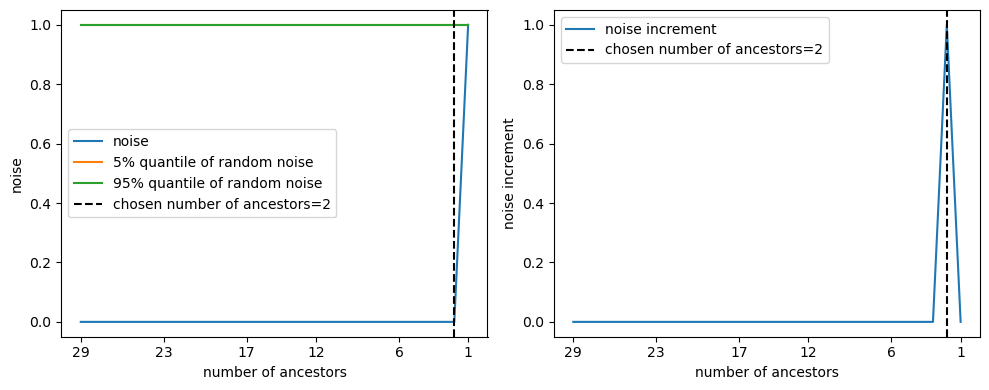

ancestors after pruning:  ['$X_{1}$', '$\\ddot{X}_{0}$'] 



inspecting $X_{1}$
gamma too small for set tolerance(6.42e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(1.25e-13), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
what about median ? 52725182.32627688
gaussian kernel (using gamma=1.26e+07)
 n/(n+s)=0.16, Z=0.24
$X_{1}$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$X_{0}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', 

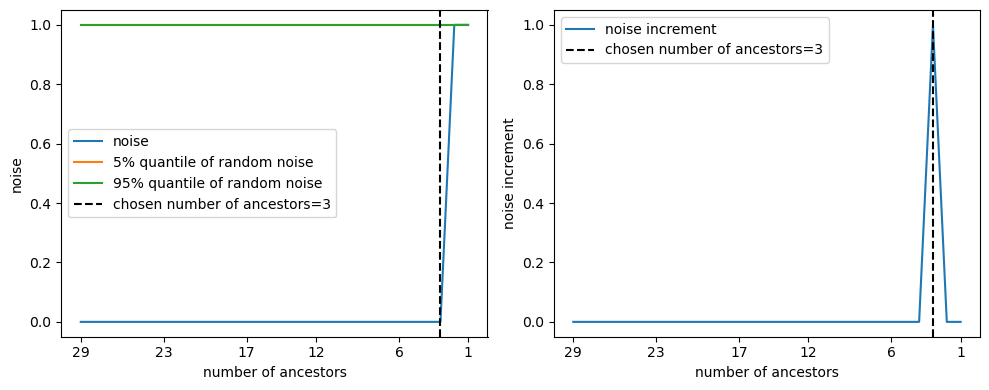

ancestors after pruning:  ['$X_{0}$', '$X_{2}$', '$\\ddot{X}_{1}$'] 



inspecting $X_{2}$
gamma too small for set tolerance(1.08e-13), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(2.05e-13), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
what about median ? 52718147.75910997
gaussian kernel (using gamma=1.26e+07)
 n/(n+s)=0.16, Z=0.24
$X_{2}$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot

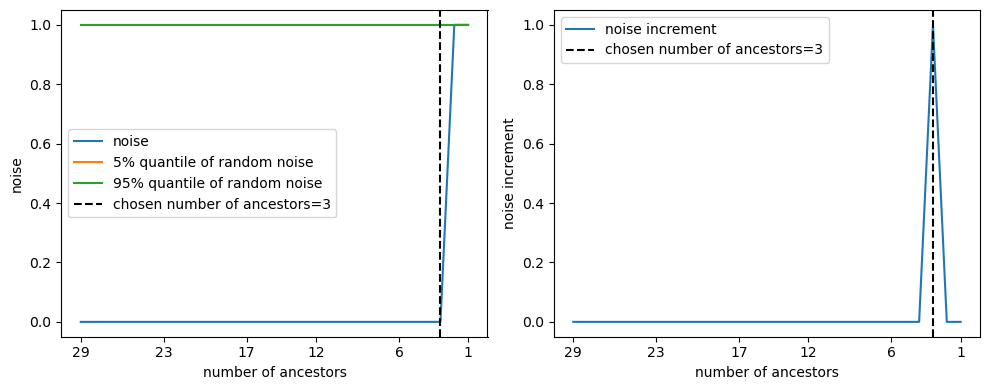

ancestors after pruning:  ['$X_{1}$', '$X_{3}$', '$\\ddot{X}_{2}$'] 



inspecting $X_{3}$
gamma too small for set tolerance(7.21e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(1.11e-13), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
what about median ? 52725507.8841038
gaussian kernel (using gamma=1.26e+07)
 n/(n+s)=0.16, Z=0.24
$X_{3}$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{

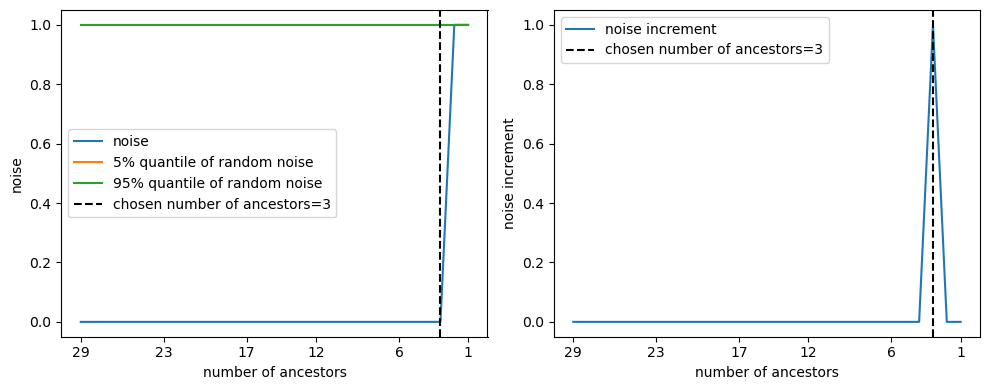

ancestors after pruning:  ['$X_{2}$', '$X_{4}$', '$\\ddot{X}_{3}$'] 



inspecting $X_{4}$
gamma too small for set tolerance(6.05e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(1.05e-13), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
what about median ? 52710393.89983636
gaussian kernel (using gamma=1.26e+07)
 n/(n+s)=0.16, Z=0.24
$X_{4}$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot

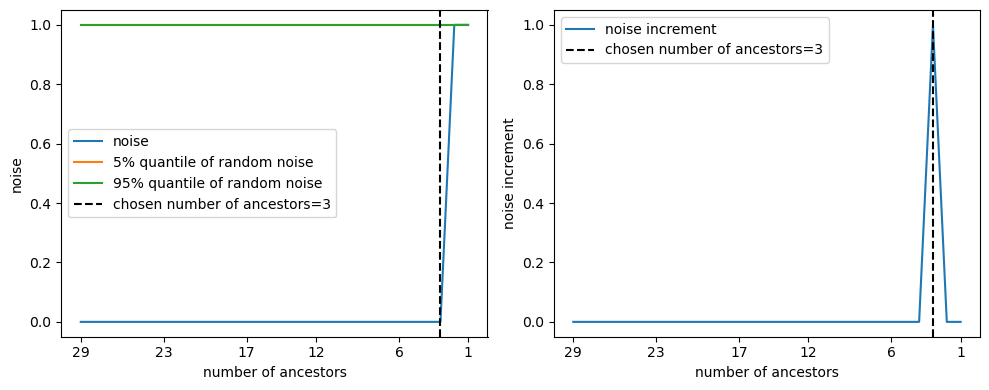

ancestors after pruning:  ['$X_{3}$', '$X_{5}$', '$\\ddot{X}_{4}$'] 



inspecting $X_{5}$
gamma too small for set tolerance(7.73e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(1.24e-13), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
what about median ? 52719711.311244816
gaussian kernel (using gamma=1.26e+07)
 n/(n+s)=0.16, Z=0.23
$X_{5}$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\do

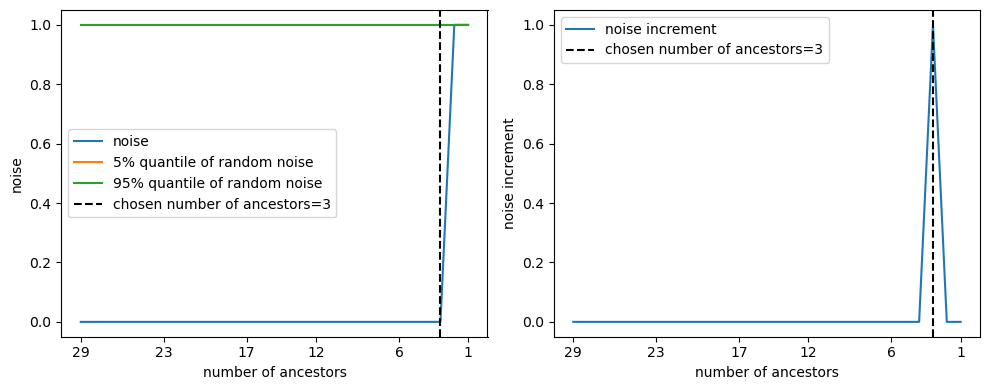

ancestors after pruning:  ['$X_{4}$', '$X_{6}$', '$\\ddot{X}_{5}$'] 



inspecting $X_{6}$
gamma too small for set tolerance(6.81e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(1.17e-13), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
what about median ? 52721279.72797833
gaussian kernel (using gamma=1.27e+07)
 n/(n+s)=0.16, Z=0.23
$X_{6}$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot

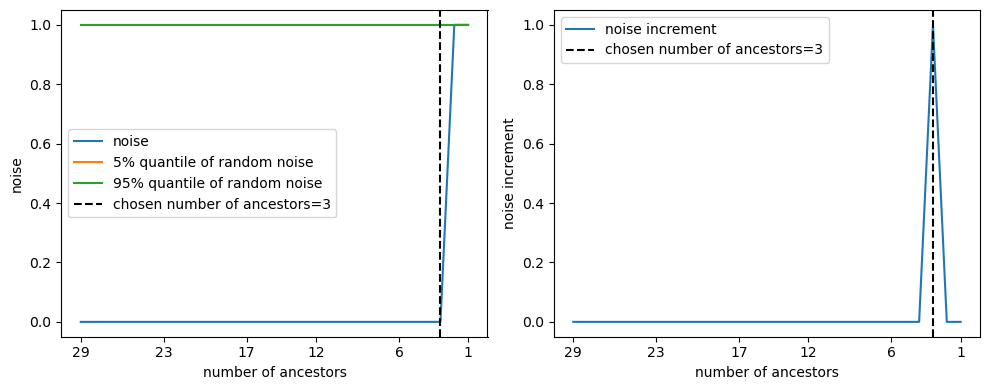

ancestors after pruning:  ['$X_{5}$', '$X_{7}$', '$\\ddot{X}_{6}$'] 



inspecting $X_{7}$
gamma too small for set tolerance(8.28e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(1.23e-13), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
what about median ? 52706524.12480028
gaussian kernel (using gamma=1.27e+07)
 n/(n+s)=0.17, Z=0.24
$X_{7}$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot

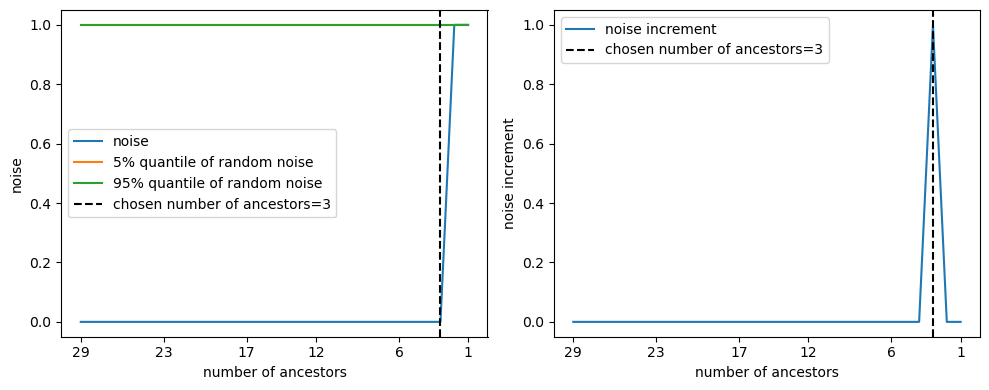

ancestors after pruning:  ['$X_{6}$', '$X_{8}$', '$\\ddot{X}_{7}$'] 



inspecting $X_{8}$
gamma too small for set tolerance(7.86e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(1.27e-13), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
what about median ? 52730762.863294855
gaussian kernel (using gamma=1.26e+07)
 n/(n+s)=0.16, Z=0.24
$X_{8}$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\do

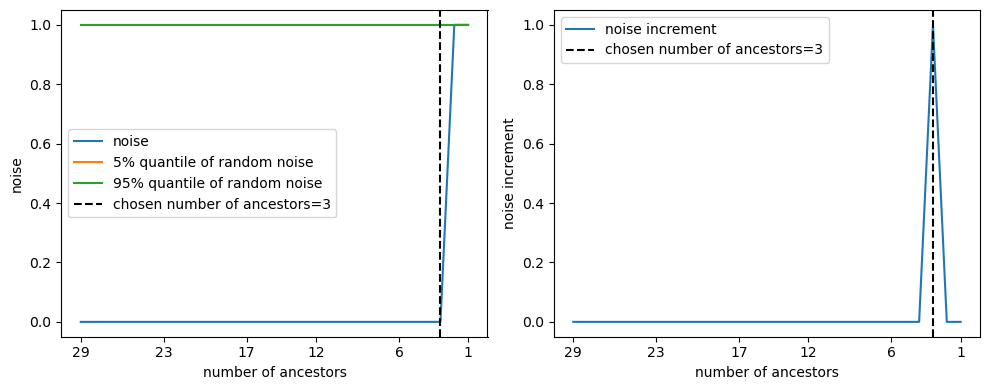

ancestors after pruning:  ['$X_{7}$', '$X_{9}$', '$\\ddot{X}_{8}$'] 



inspecting $X_{9}$
gamma too small for set tolerance(5.75e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(9.61e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
what about median ? 52705746.3436624
gaussian kernel (using gamma=1.27e+07)
 n/(n+s)=0.16, Z=0.24
$X_{9}$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{

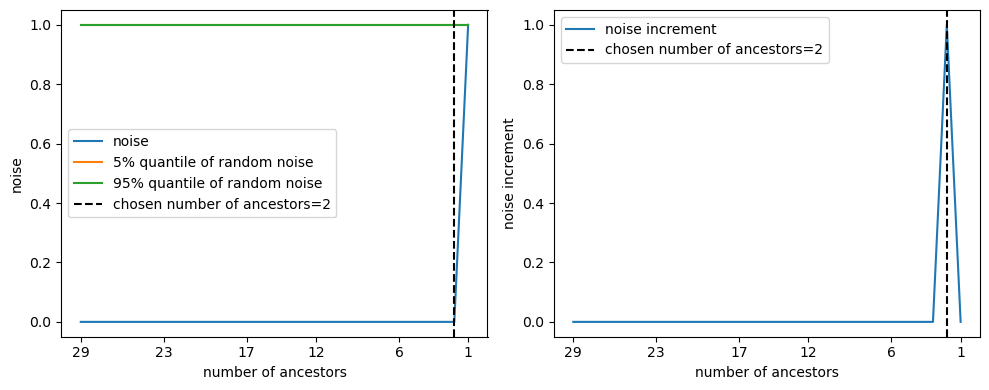

ancestors after pruning:  ['$X_{8}$', '$\\ddot{X}_{9}$'] 



inspecting $\dot{X}_{0}$
linear kernel (using gamma=2.12e+01)
 n/(n+s)=0.85, Z=1.00
quadratic kernel (using gamma=1.87e+01)
 n/(n+s)=0.82, Z=0.97
what about median ? 52676109.90697301
gaussian kernel (using gamma=1.28e+07)
 n/(n+s)=0.18, Z=0.24
$\dot{X}_{0}$ has ancestors with gaussian kernel (n/(s+n)=0.18)
what about median ? 26167972.454319015
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.19, Z=0.25
what about median ? 12980513.05927319
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5

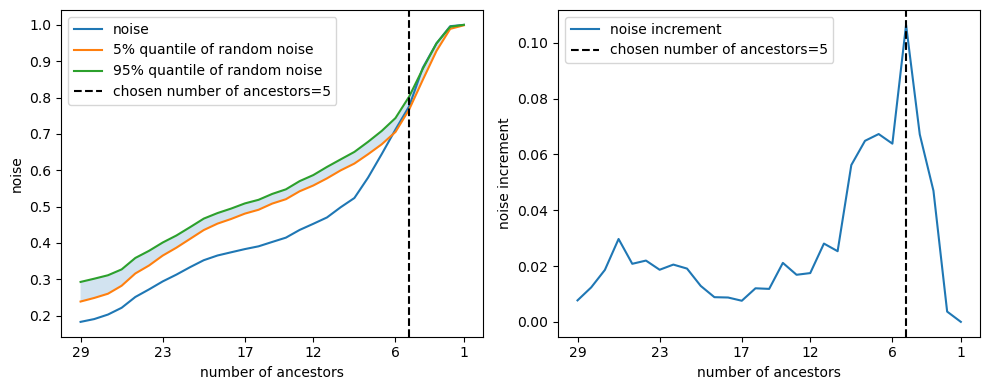

ancestors after pruning:  ['$X_{0}$', '$X_{1}$', '$\\dot{X}_{1}$', '$\\dot{X}_{3}$', '$\\ddot{X}_{3}$'] 



inspecting $\dot{X}_{1}$
linear kernel (using gamma=1.47e+01)
 n/(n+s)=0.72, Z=1.00
quadratic kernel (using gamma=1.29e+01)
 n/(n+s)=0.69, Z=0.97
what about median ? 52675027.67153619
gaussian kernel (using gamma=1.27e+07)
 n/(n+s)=0.18, Z=0.24
$\dot{X}_{1}$ has ancestors with gaussian kernel (n/(s+n)=0.18)
what about median ? 26182717.022279546
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.18, Z=0.25
what about median ? 12988524.654041823
ancestors : ['$X_{0}$', '$

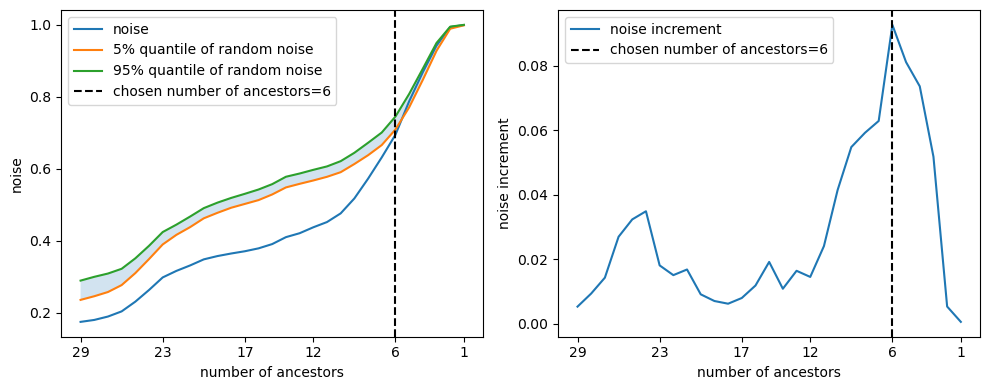

ancestors after pruning:  ['$X_{1}$', '$X_{2}$', '$X_{7}$', '$\\dot{X}_{0}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$'] 



inspecting $\dot{X}_{2}$
linear kernel (using gamma=1.27e+01)
 n/(n+s)=0.65, Z=1.00
quadratic kernel (using gamma=1.12e+01)
 n/(n+s)=0.62, Z=0.97
what about median ? 52680575.03711599
gaussian kernel (using gamma=1.27e+07)
 n/(n+s)=0.17, Z=0.24
$\dot{X}_{2}$ has ancestors with gaussian kernel (n/(s+n)=0.17)
what about median ? 26189111.224488474
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.18, Z=0.25
what about median ? 13018312.663040282
ancestors : ['$X

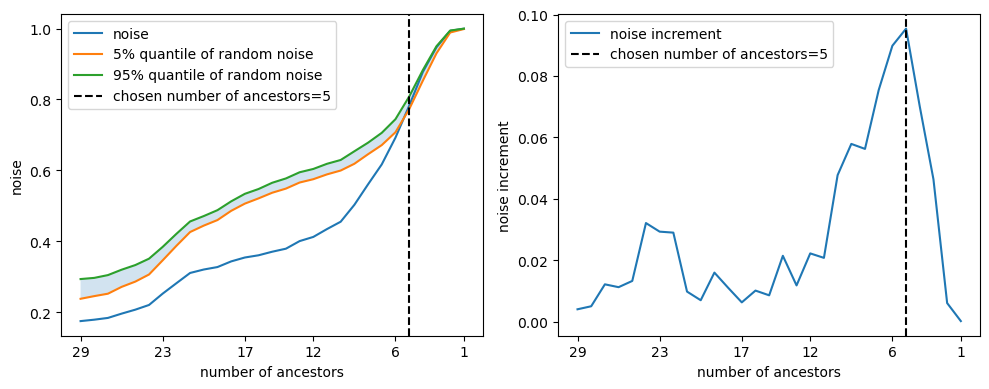

ancestors after pruning:  ['$X_{3}$', '$X_{8}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{3}$'] 



inspecting $\dot{X}_{3}$
linear kernel (using gamma=1.22e+01)
 n/(n+s)=0.63, Z=1.00
quadratic kernel (using gamma=1.06e+01)
 n/(n+s)=0.59, Z=0.97
what about median ? 52656583.90773991
gaussian kernel (using gamma=1.26e+07)
 n/(n+s)=0.17, Z=0.23
$\dot{X}_{3}$ has ancestors with gaussian kernel (n/(s+n)=0.17)
what about median ? 26214951.70895505
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.17, Z=0.24
what about median ? 13036259.388987688
ancestors : ['$X_{0}$

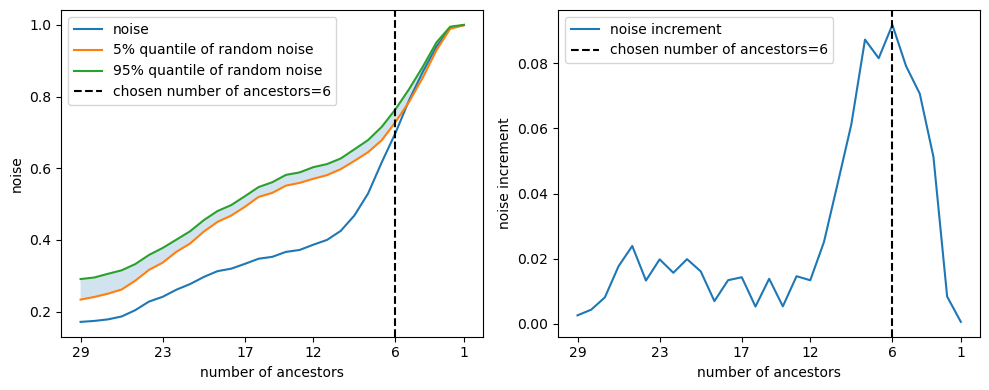

ancestors after pruning:  ['$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\ddot{X}_{9}$'] 



inspecting $\dot{X}_{4}$
linear kernel (using gamma=1.19e+01)
 n/(n+s)=0.61, Z=1.00
quadratic kernel (using gamma=1.06e+01)
 n/(n+s)=0.60, Z=0.97
what about median ? 52676323.97717956
gaussian kernel (using gamma=1.26e+07)
 n/(n+s)=0.17, Z=0.24
$\dot{X}_{4}$ has ancestors with gaussian kernel (n/(s+n)=0.17)
what about median ? 26213816.832264654
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.17, Z=0.24
what about median ? 130394

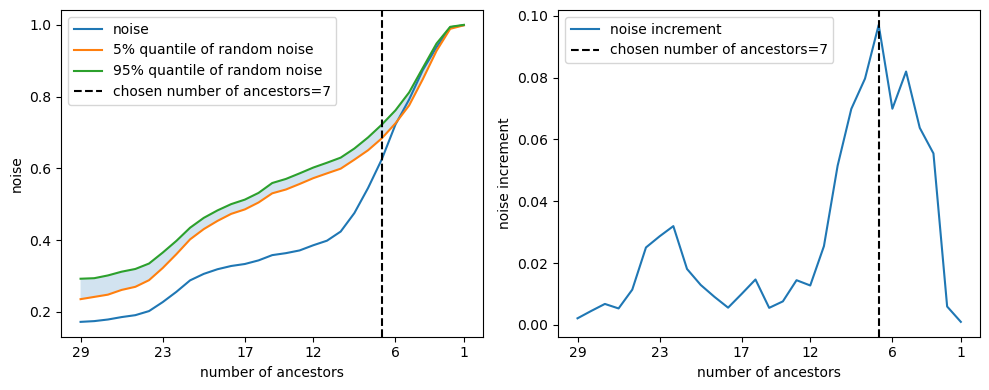

ancestors after pruning:  ['$X_{5}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$'] 



inspecting $\dot{X}_{5}$
linear kernel (using gamma=1.15e+01)
 n/(n+s)=0.60, Z=1.00
quadratic kernel (using gamma=1.01e+01)
 n/(n+s)=0.58, Z=0.97
what about median ? 52687306.301072836
gaussian kernel (using gamma=1.27e+07)
 n/(n+s)=0.17, Z=0.24
$\dot{X}_{5}$ has ancestors with gaussian kernel (n/(s+n)=0.17)
what about median ? 26197714.493463572
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.18, Z=0.25
what about median ? 13

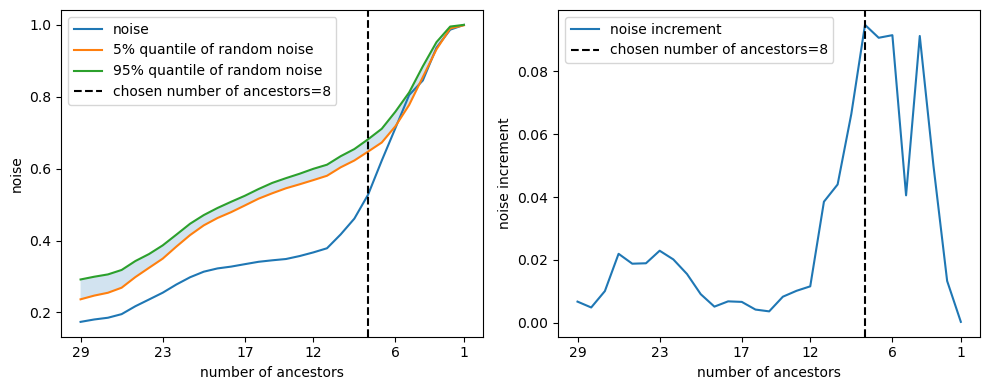

ancestors after pruning:  ['$X_{6}$', '$X_{8}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$'] 



inspecting $\dot{X}_{6}$
linear kernel (using gamma=1.19e+01)
 n/(n+s)=0.62, Z=1.00
quadratic kernel (using gamma=1.05e+01)
 n/(n+s)=0.60, Z=0.97
what about median ? 52675780.02938914
gaussian kernel (using gamma=1.27e+07)
 n/(n+s)=0.17, Z=0.24
$\dot{X}_{6}$ has ancestors with gaussian kernel (n/(s+n)=0.17)
what about median ? 26214718.565088965
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.18, Z=0.24
what 

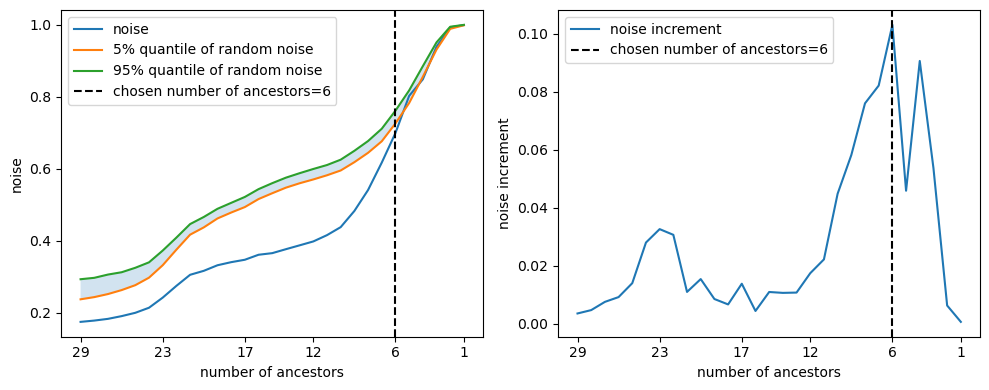

ancestors after pruning:  ['$X_{0}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$'] 



inspecting $\dot{X}_{7}$
linear kernel (using gamma=1.33e+01)
 n/(n+s)=0.67, Z=1.00
quadratic kernel (using gamma=1.19e+01)
 n/(n+s)=0.66, Z=0.97
what about median ? 52666043.0070031
gaussian kernel (using gamma=1.28e+07)
 n/(n+s)=0.18, Z=0.24
$\dot{X}_{7}$ has ancestors with gaussian kernel (n/(s+n)=0.18)
what about median ? 26195231.978437666
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.18, Z=0.25
what about median ? 13016704.556866784
anc

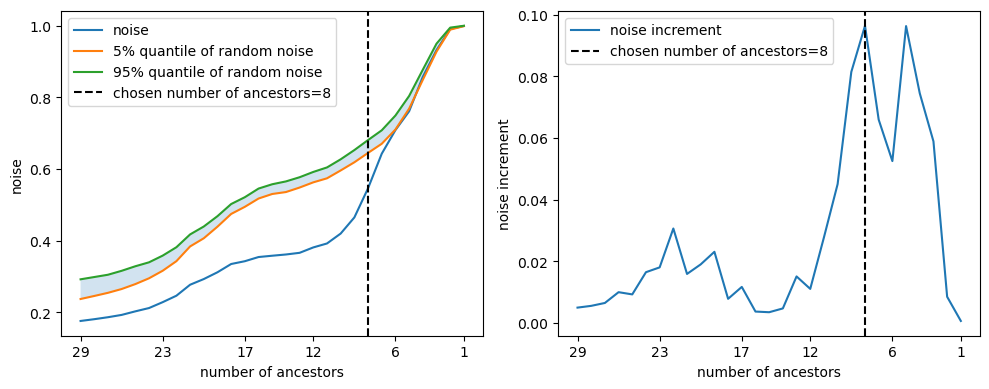

ancestors after pruning:  ['$X_{1}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{3}$'] 



inspecting $\dot{X}_{8}$
linear kernel (using gamma=1.61e+01)
 n/(n+s)=0.76, Z=1.00
quadratic kernel (using gamma=1.45e+01)
 n/(n+s)=0.74, Z=0.97
what about median ? 52670997.988090605
gaussian kernel (using gamma=1.27e+07)
 n/(n+s)=0.17, Z=0.24
$\dot{X}_{8}$ has ancestors with gaussian kernel (n/(s+n)=0.17)
what about median ? 26185066.804846413
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.18, Z=0.24
wha

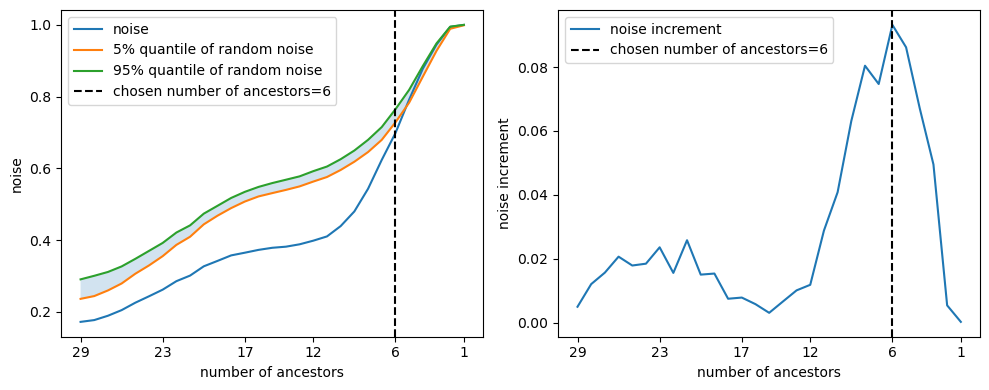

ancestors after pruning:  ['$X_{8}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{9}$'] 



inspecting $\dot{X}_{9}$
linear kernel (using gamma=2.24e+01)
 n/(n+s)=0.88, Z=1.00
quadratic kernel (using gamma=1.93e+01)
 n/(n+s)=0.84, Z=0.96
what about median ? 52640819.801205665
gaussian kernel (using gamma=1.27e+07)
 n/(n+s)=0.18, Z=0.24
$\dot{X}_{9}$ has ancestors with gaussian kernel (n/(s+n)=0.18)
what about median ? 26167972.454319015
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.19, Z=0.25
what about median ? 12977550.376982987
a

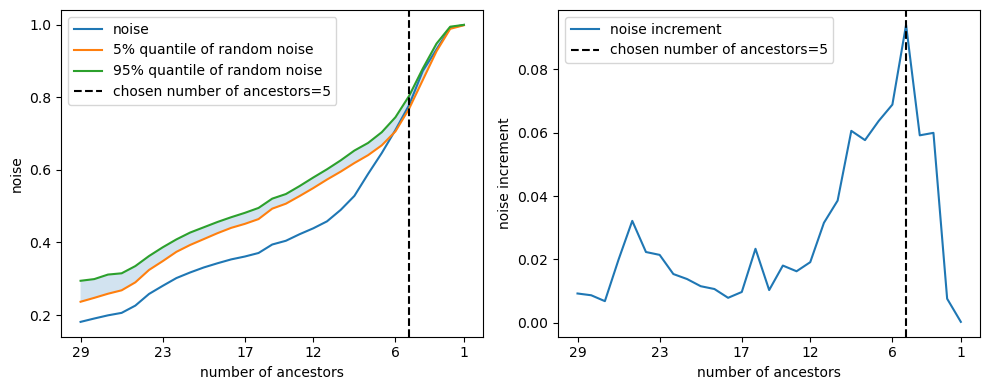

ancestors after pruning:  ['$X_{1}$', '$X_{5}$', '$X_{8}$', '$\\dot{X}_{2}$', '$\\dot{X}_{4}$'] 



inspecting $\ddot{X}_{0}$
gamma too small for set tolerance(5.47e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(5.95e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
what about median ? 52751469.16459288
gaussian kernel (using gamma=1.25e+07)
 n/(n+s)=0.16, Z=0.23
$\ddot{X}_{0}$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{

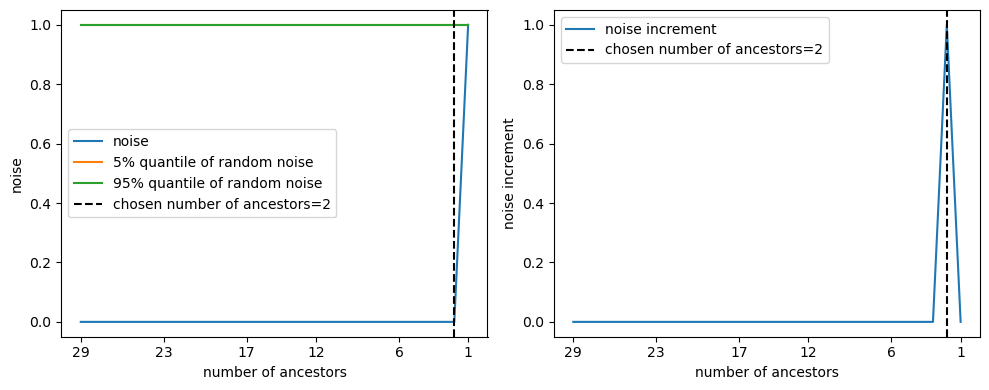

ancestors after pruning:  ['$X_{0}$', '$X_{1}$'] 



inspecting $\ddot{X}_{1}$
gamma too small for set tolerance(6.10e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(6.73e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
what about median ? 52775190.42701101
gaussian kernel (using gamma=1.24e+07)
 n/(n+s)=0.15, Z=0.23
$\ddot{X}_{1}$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '

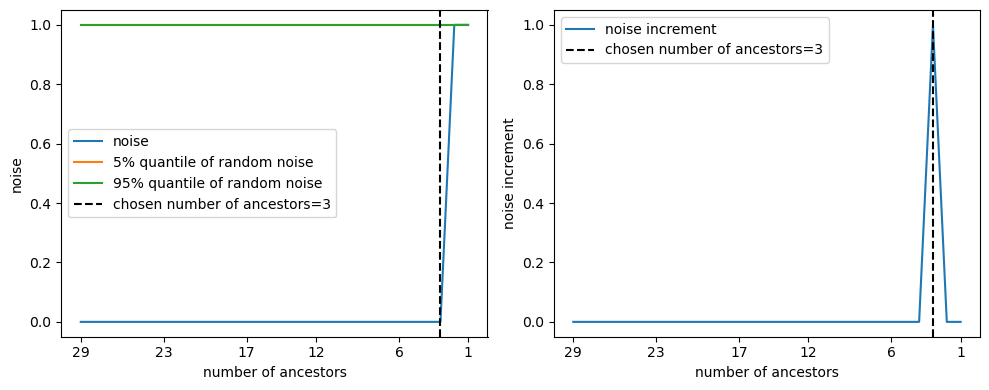

ancestors after pruning:  ['$X_{1}$', '$X_{2}$', '$\\ddot{X}_{0}$'] 



inspecting $\ddot{X}_{2}$
gamma too small for set tolerance(6.17e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(6.67e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
what about median ? 52773261.62504945
gaussian kernel (using gamma=1.25e+07)
 n/(n+s)=0.15, Z=0.23
$\ddot{X}_{2}$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', 

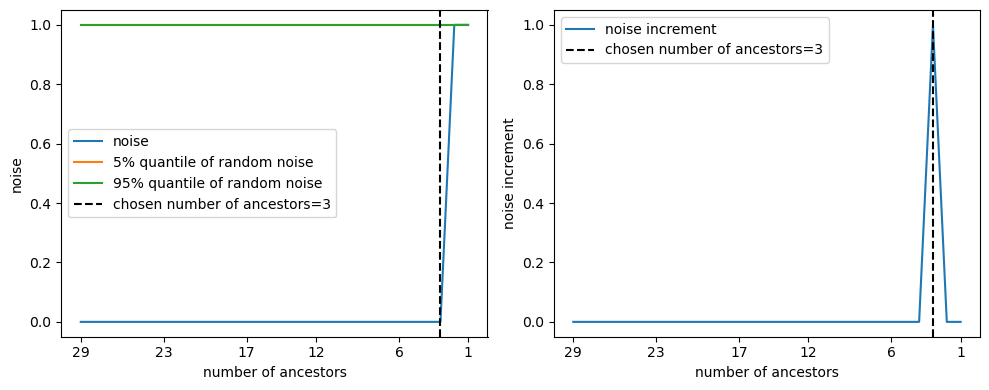

ancestors after pruning:  ['$X_{1}$', '$X_{2}$', '$X_{3}$'] 



inspecting $\ddot{X}_{3}$
gamma too small for set tolerance(5.77e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(6.03e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
what about median ? 52786096.32729155
gaussian kernel (using gamma=1.24e+07)
 n/(n+s)=0.15, Z=0.23
$\ddot{X}_{3}$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{

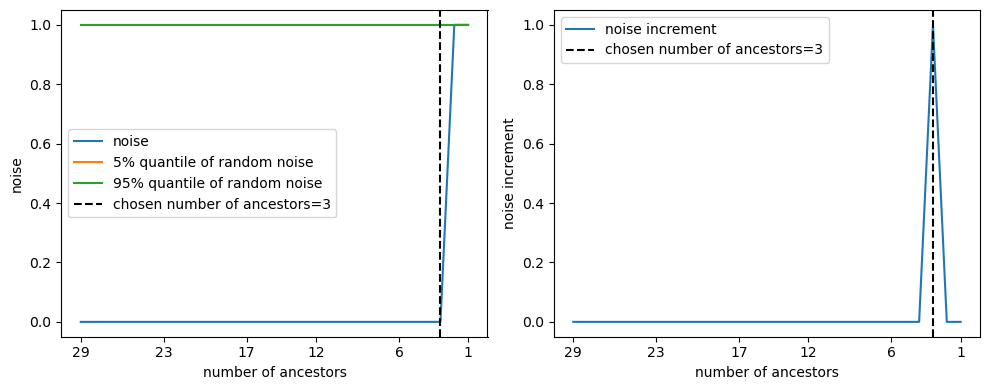

ancestors after pruning:  ['$X_{2}$', '$X_{3}$', '$X_{4}$'] 



inspecting $\ddot{X}_{4}$
gamma too small for set tolerance(5.71e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(5.56e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
what about median ? 52768062.5213093
gaussian kernel (using gamma=1.24e+07)
 n/(n+s)=0.15, Z=0.23
$\ddot{X}_{4}$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X

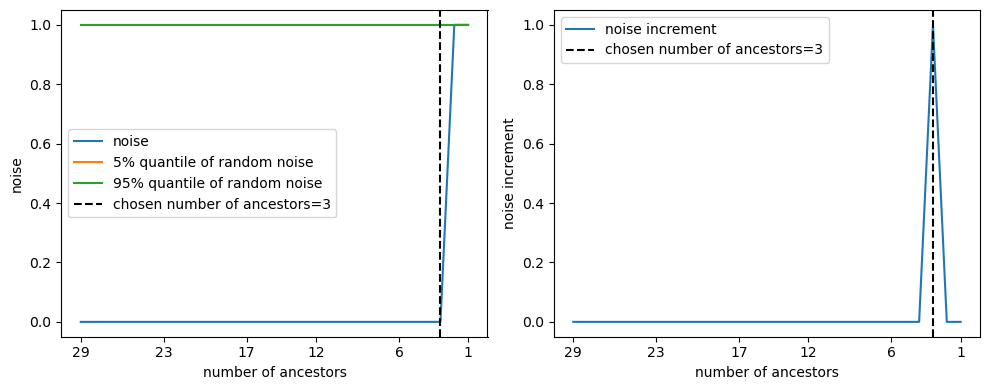

ancestors after pruning:  ['$X_{3}$', '$X_{4}$', '$X_{5}$'] 



inspecting $\ddot{X}_{5}$
gamma too small for set tolerance(5.93e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(6.31e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
what about median ? 52779084.76096804
gaussian kernel (using gamma=1.24e+07)
 n/(n+s)=0.15, Z=0.23
$\ddot{X}_{5}$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{

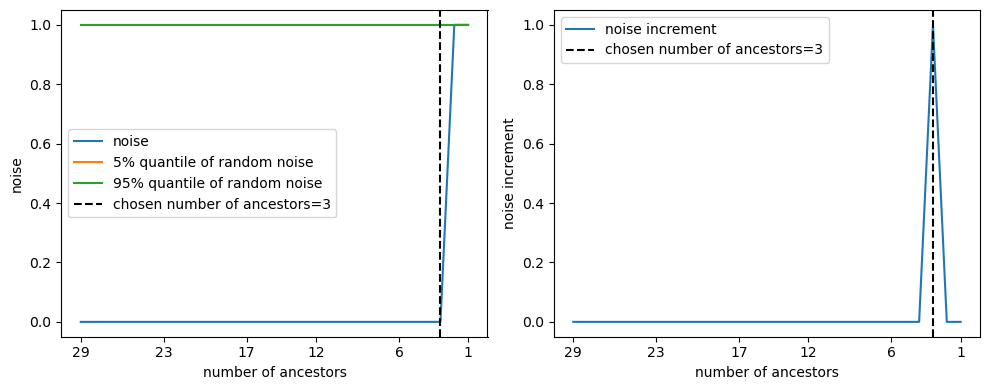

ancestors after pruning:  ['$X_{4}$', '$X_{5}$', '$X_{6}$'] 



inspecting $\ddot{X}_{6}$
gamma too small for set tolerance(5.97e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(6.12e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
what about median ? 52777378.73555245
gaussian kernel (using gamma=1.25e+07)
 n/(n+s)=0.15, Z=0.23
$\ddot{X}_{6}$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{

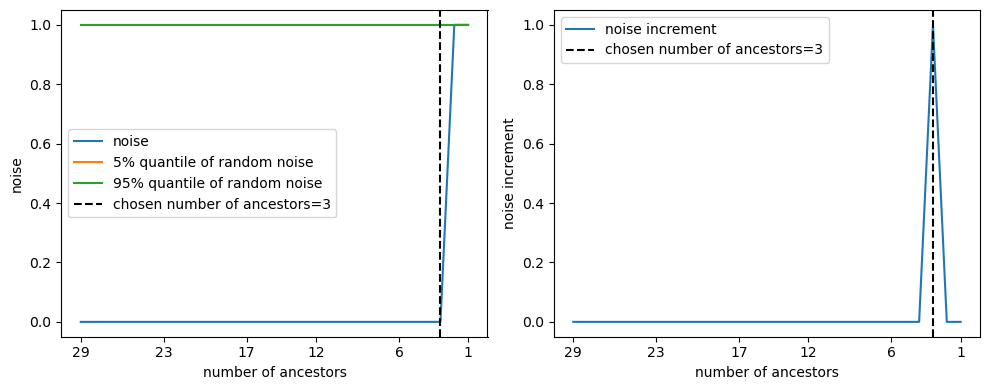

ancestors after pruning:  ['$X_{5}$', '$X_{6}$', '$X_{7}$'] 



inspecting $\ddot{X}_{7}$
gamma too small for set tolerance(5.96e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(5.83e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
what about median ? 52765511.318806075
gaussian kernel (using gamma=1.25e+07)
 n/(n+s)=0.15, Z=0.23
$\ddot{X}_{7}$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot

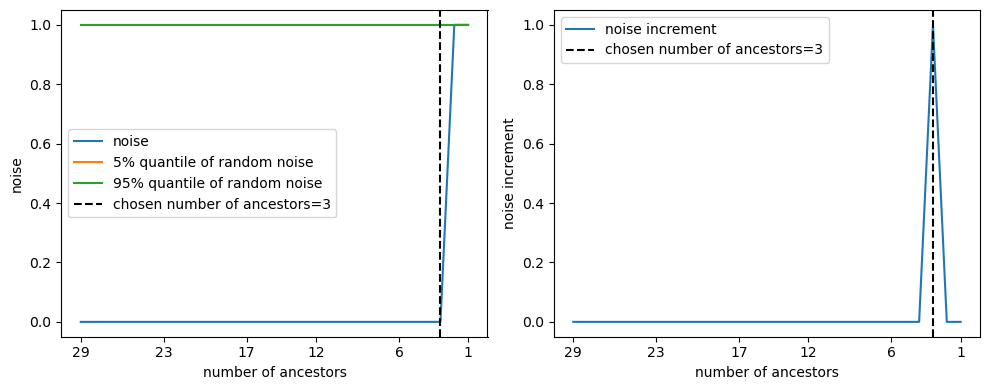

ancestors after pruning:  ['$X_{6}$', '$X_{7}$', '$X_{8}$'] 



inspecting $\ddot{X}_{8}$
gamma too small for set tolerance(6.88e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(5.77e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
what about median ? 52768227.49994398
gaussian kernel (using gamma=1.26e+07)
 n/(n+s)=0.15, Z=0.24
$\ddot{X}_{8}$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{

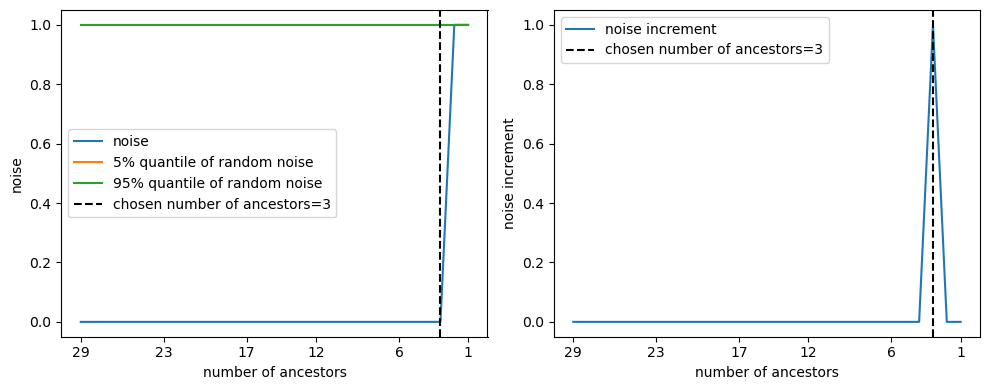

ancestors after pruning:  ['$X_{7}$', '$X_{8}$', '$\\ddot{X}_{9}$'] 



inspecting $\ddot{X}_{9}$
gamma too small for set tolerance(5.31e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(6.52e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
what about median ? 52751170.55899563
gaussian kernel (using gamma=1.26e+07)
 n/(n+s)=0.16, Z=0.24
$\ddot{X}_{9}$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', 

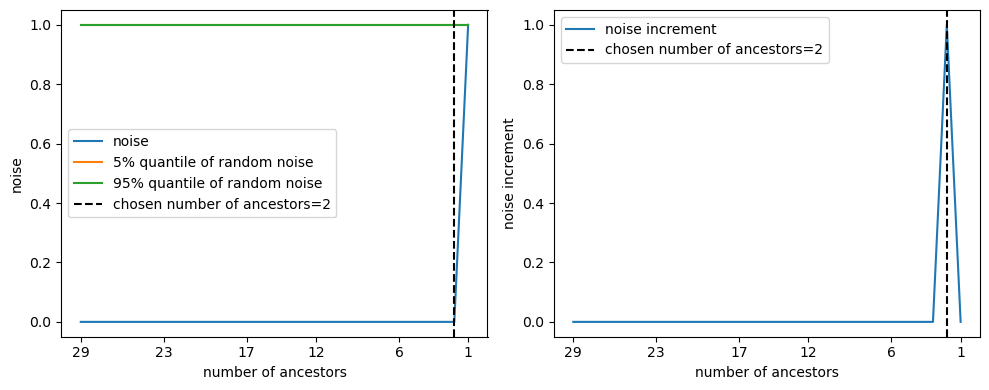

ancestors after pruning:  ['$X_{8}$', '$X_{9}$'] 





In [7]:
for node in graph_discovery.names:
    print(f'inspecting {node}')
    graph_discovery.find_ancestors(
        node,
        gamma='auto'
    )
    print('\n')
    pickle.dump(graph_discovery.G, open(f'graph_linear.pickle', 'wb'))

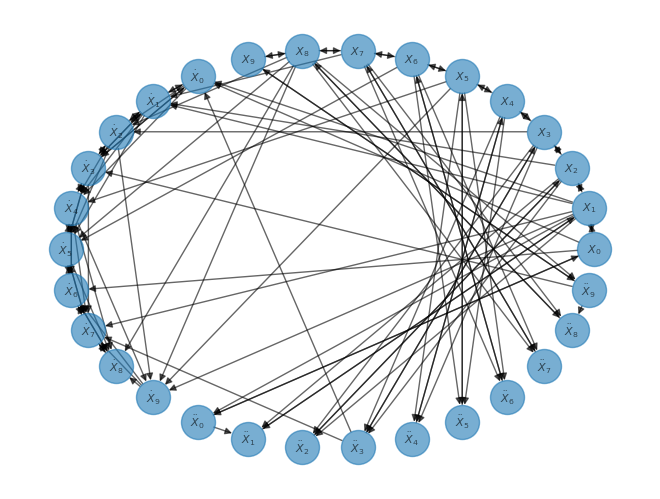

In [8]:
graph_discovery.plot_graph(type_label=False)

# Non-Linear FPUT

In [9]:
df=pd.read_csv('FPUT_non_linear.csv')
node_names=df.columns
X=df.to_numpy()
X=(X-onp.mean(X,axis=0))/onp.std(X,axis=0)
df

$X_{0}$   $X_{1}$   $X_{2}$   $X_{3}$   $X_{4}$   $X_{5}$   $X_{6}$  \
0   -0.353162 -0.027925 -0.060415  0.151765  0.010142  0.243446 -0.032991   
1    0.181612 -0.040168  0.039506 -0.350263 -0.356168 -0.296971 -0.066569   
2    0.181387  0.689829  0.177607  0.247176  0.169467  0.147400  0.475722   
3    0.108495 -0.263442  0.085607 -0.526893  0.126317  0.168490  0.072781   
4    0.318325 -0.155868  0.214159 -0.362474  0.136723  0.003964 -0.052347   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.097388 -0.362862  0.124927 -0.376848  0.182781 -0.472934  0.278333   
996  0.055470  0.181867  0.204995 -0.480468  0.468355 -0.078220  0.418435   
997 -0.058144 -0.165295  0.084218 -0.186435  0.401695 -0.367180  0.221276   
998 -0.057468  0.207577 -0.074452 -0.340633 -0.011811  0.110838 -0.188654   
999  0.363133  0.057158  0.191549 -0.050302 -0.111199 -0.215105  0.102461   

      $X_{7}$   $X_{8}$   $X_{9}$  ...  $\ddot{X}_{0}$  $\ddot{X}_{1}$  \
0   -0.229524  0.236459  0.039009  ...       54.993213      -31.459180   
1   -0.422200 -0.463840 -0.316946  ...      -32.727555       24.910978   
2   -0.171927  0.315934 -0.125602  ...       39.097769      -82.674935   
3    0.313828 -0.278529 -0.107404  ...      -41.615858       58.430547   
4    0.296391 -0.269704 -0.238277  ...      -65.753482       69.123741   
..        ...       ...       ...  ...             ...             ...   
995 -0.110748  0.436868  0.170341  ...      -51.115928       76.849319   
996 -0.173228  0.204591 -0.434794  ...        5.935058       -8.551795   
997 -0.259655  0.445895  0.175709  ...       -4.077966       29.475257   
998 -0.131314  0.067691 -0.305993  ...       27.249219      -44.325810   
999 -0.063100 -0.255156  0.083017  ...      -54.374800       36.719806   

     $\ddot{X}_{2}$  $\ddot{X}_{3}$  $\ddot{X}_{4}$  $\ddot{X}_{5}$  \
0         20.458112      -28.800655       30.624385      -41.365914   
1        -41.681386       35.960815        5.288329       15.030604   
2         56.358749      -11.930256        4.551912       31.043421   
3        -83.291167      102.692317      -73.427018      -11.200548   
4        -79.952551       87.664703      -58.061758        6.413550   
..              ...             ...             ...             ...   
995      -80.170319       86.261473      -99.351720      115.006100   
996      -82.574678      141.558568     -140.725955       84.712117   
997      -42.152234       76.572594     -113.508261      113.522602   
998        1.669535       48.384258      -20.103760      -35.262866   
999      -30.827505       16.000652       -3.578315       35.697711   

     $\ddot{X}_{6}$  $\ddot{X}_{7}$  $\ddot{X}_{8}$  $\ddot{X}_{9}$  
0          7.920080       57.560078      -57.613237       13.551324  
1        -48.213101       29.447335       15.440301       16.737826  
2        -87.114628       94.324581      -75.442681       50.523425  
3         27.853479      -75.837294       72.815185       -5.561878  
4         35.614576      -77.602247       62.235105       17.973559  
..              ...             ...             ...             ...  
995     -104.485005       77.779434      -71.155972        9.277894  
996      -88.949437       82.119032      -88.030636       90.650482  
997      -87.621847      100.953804      -94.014955        9.174123  
998       30.598250       12.228902      -47.803172       55.306065  
999      -40.037472       -2.420546       43.865446      -36.337450  

[1000 rows x 30 columns]

In [11]:
modes=ModeContainer.make_container(
    X.T,
    onp.array(node_names),
    {'name':'linear','beta':0.1,'type':'individual','interpolatory':False,'default':True},
    {'name':'quadratic','beta':0.1,'type':'pairwise','interpolatory':False,'default':True},
    {'name':'gaussian','beta':0.1,'type':'combinatorial','interpolatory':True,'default':True,'l':1},
)

In [12]:

graph_discovery=GraphDiscoveryNew(X.T,onp.array(node_names),modes)

inspecting $X_{0}$
linear kernel (using gamma=2.22e+00)
 n/(n+s)=0.17, Z=1.00
quadratic kernel (using gamma=1.26e+00)
 n/(n+s)=0.16, Z=0.95
what about median ? 52789362.41664435
gaussian kernel (using gamma=1.42e+07)
 n/(n+s)=0.18, Z=0.25
$X_{0}$ has ancestors with quadratic kernel (n/(s+n)=0.16)
ancestors : ['$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.16, Z=0.96
ancestors : ['$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}

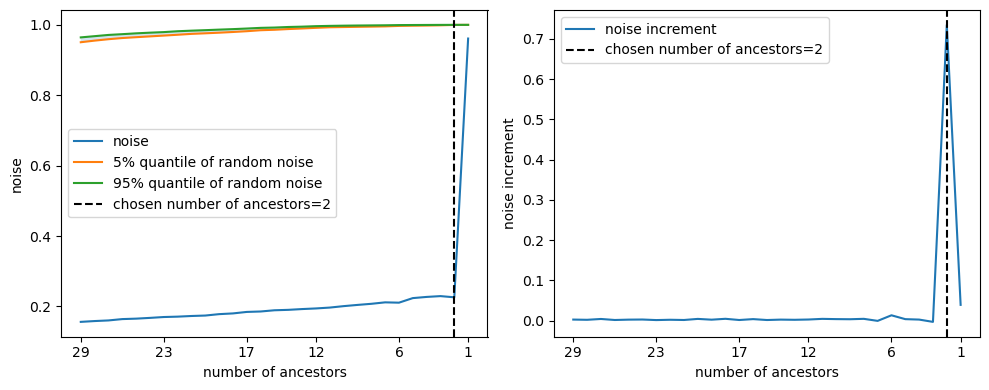

ancestors after pruning:  ['$X_{1}$', '$\\ddot{X}_{0}$'] 



inspecting $X_{1}$
linear kernel (using gamma=2.68e+00)
 n/(n+s)=0.22, Z=1.00
quadratic kernel (using gamma=1.53e+00)
 n/(n+s)=0.21, Z=0.95
what about median ? 52804616.579418525
gaussian kernel (using gamma=1.42e+07)
 n/(n+s)=0.18, Z=0.25
$X_{1}$ has ancestors with gaussian kernel (n/(s+n)=0.18)
what about median ? 26274320.888707124
ancestors : ['$X_{0}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.18, Z=0.26
what about median ? 13042313.8220201
ancestors : ['$X_{0}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', 

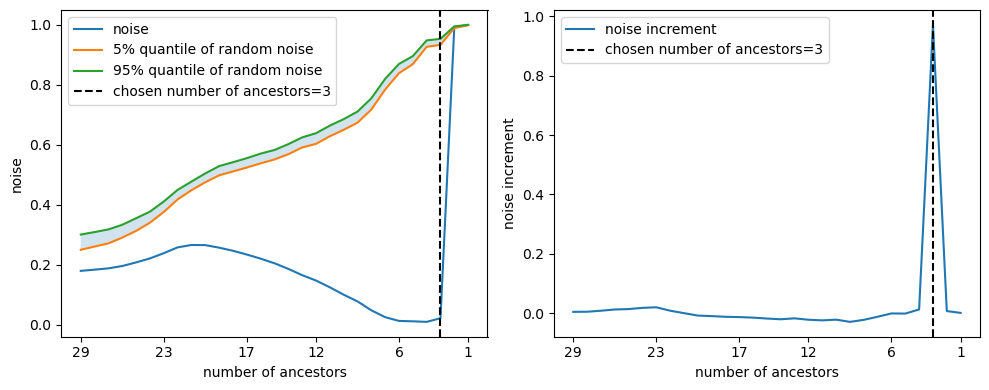

ancestors after pruning:  ['$X_{0}$', '$X_{2}$', '$\\ddot{X}_{1}$'] 



inspecting $X_{2}$
linear kernel (using gamma=2.61e+00)
 n/(n+s)=0.20, Z=1.00
quadratic kernel (using gamma=1.56e+00)
 n/(n+s)=0.19, Z=0.95
what about median ? 52795916.47617492
gaussian kernel (using gamma=1.41e+07)
 n/(n+s)=0.18, Z=0.25
$X_{2}$ has ancestors with gaussian kernel (n/(s+n)=0.18)
what about median ? 26271269.917756706
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.19, Z=0.26
what about median ? 13048282.072641665
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{3}$', '$X_{4}$', '$X_{5}$',

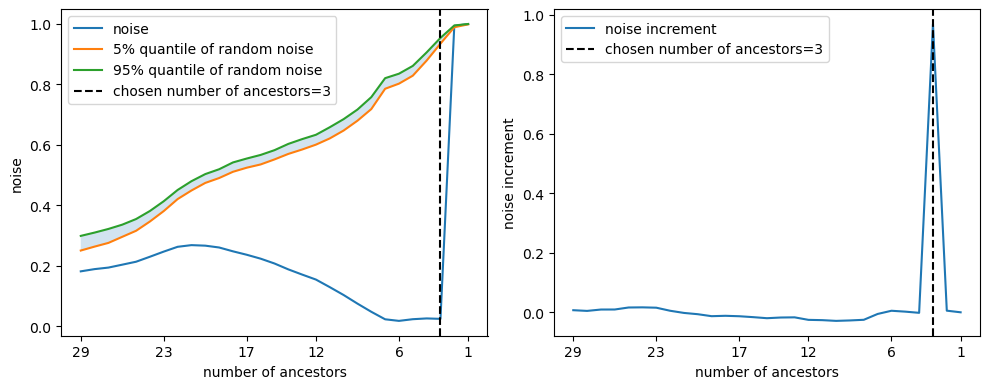

ancestors after pruning:  ['$X_{1}$', '$X_{3}$', '$\\ddot{X}_{2}$'] 



inspecting $X_{3}$
linear kernel (using gamma=2.41e+00)
 n/(n+s)=0.19, Z=1.00
quadratic kernel (using gamma=1.51e+00)
 n/(n+s)=0.17, Z=0.95
what about median ? 52782097.96489982
gaussian kernel (using gamma=1.41e+07)
 n/(n+s)=0.18, Z=0.25
$X_{3}$ has ancestors with quadratic kernel (n/(s+n)=0.17)
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$']
 n/(n+s)=0.18, Z=0.95
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{

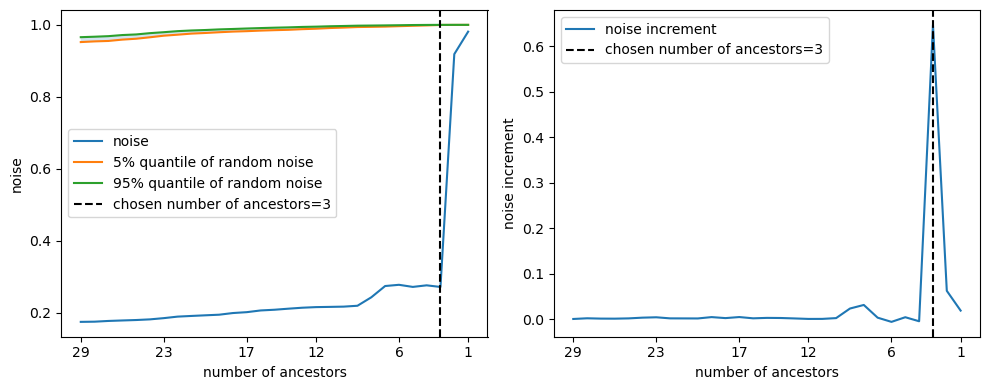

ancestors after pruning:  ['$X_{2}$', '$X_{4}$', '$\\ddot{X}_{3}$'] 



inspecting $X_{4}$
linear kernel (using gamma=2.82e+00)
 n/(n+s)=0.23, Z=1.00
quadratic kernel (using gamma=1.67e+00)
 n/(n+s)=0.22, Z=0.95
what about median ? 52796234.10755797
gaussian kernel (using gamma=1.42e+07)
 n/(n+s)=0.18, Z=0.25
$X_{4}$ has ancestors with gaussian kernel (n/(s+n)=0.18)
what about median ? 26260638.221225005
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.19, Z=0.26
what about median ? 13051685.829447877
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{5}$',

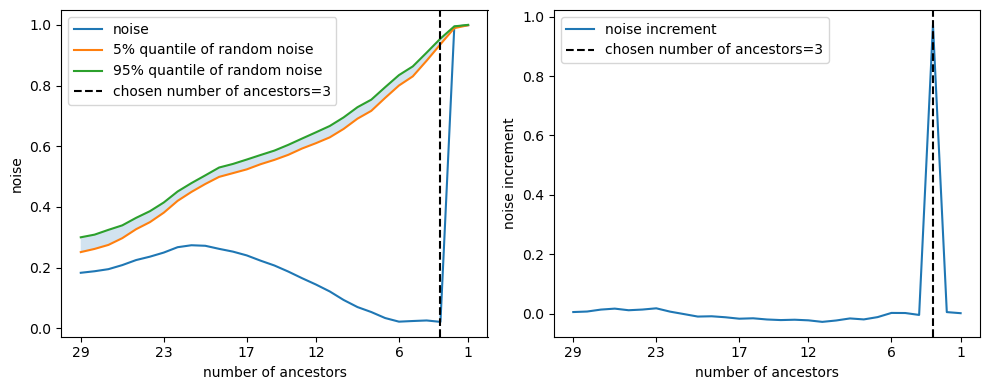

ancestors after pruning:  ['$X_{3}$', '$X_{5}$', '$\\ddot{X}_{4}$'] 



inspecting $X_{5}$
linear kernel (using gamma=2.80e+00)
 n/(n+s)=0.20, Z=1.00
quadratic kernel (using gamma=1.65e+00)
 n/(n+s)=0.20, Z=0.95
what about median ? 52785258.557849415
gaussian kernel (using gamma=1.41e+07)
 n/(n+s)=0.18, Z=0.25
$X_{5}$ has ancestors with gaussian kernel (n/(s+n)=0.18)
what about median ? 26261536.5397402
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.19, Z=0.26
what about median ? 13045733.982396234
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', 

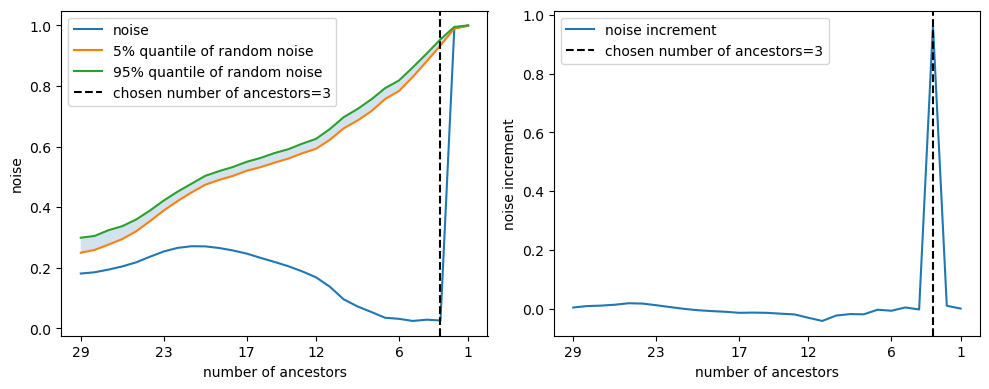

ancestors after pruning:  ['$X_{4}$', '$X_{6}$', '$\\ddot{X}_{5}$'] 



inspecting $X_{6}$
linear kernel (using gamma=2.70e+00)
 n/(n+s)=0.21, Z=1.00
quadratic kernel (using gamma=1.51e+00)
 n/(n+s)=0.20, Z=0.95
what about median ? 52783126.931916445
gaussian kernel (using gamma=1.41e+07)
 n/(n+s)=0.18, Z=0.25
$X_{6}$ has ancestors with gaussian kernel (n/(s+n)=0.18)
what about median ? 26258651.780903712
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.19, Z=0.26
what about median ? 13047116.883284941
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$'

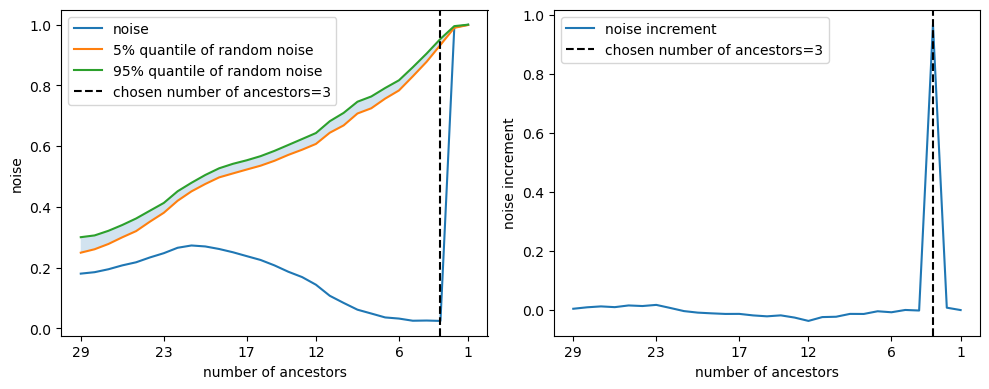

ancestors after pruning:  ['$X_{5}$', '$X_{7}$', '$\\ddot{X}_{6}$'] 



inspecting $X_{7}$
linear kernel (using gamma=2.50e+00)
 n/(n+s)=0.19, Z=1.00
quadratic kernel (using gamma=1.41e+00)
 n/(n+s)=0.17, Z=0.95
what about median ? 52779201.14263113
gaussian kernel (using gamma=1.43e+07)
 n/(n+s)=0.18, Z=0.25
$X_{7}$ has ancestors with quadratic kernel (n/(s+n)=0.17)
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.18, Z=0.96
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}

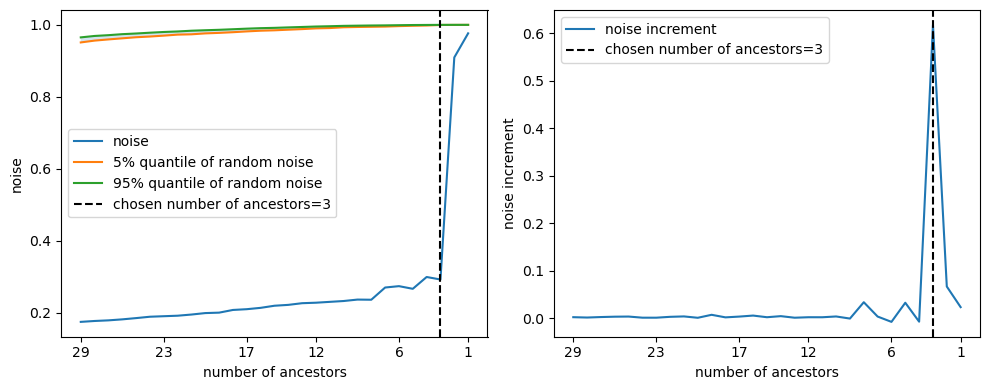

ancestors after pruning:  ['$X_{6}$', '$X_{8}$', '$\\ddot{X}_{7}$'] 



inspecting $X_{8}$
linear kernel (using gamma=2.54e+00)
 n/(n+s)=0.21, Z=1.00
quadratic kernel (using gamma=1.34e+00)
 n/(n+s)=0.20, Z=0.95
what about median ? 52787119.32228787
gaussian kernel (using gamma=1.43e+07)
 n/(n+s)=0.18, Z=0.25
$X_{8}$ has ancestors with gaussian kernel (n/(s+n)=0.18)
what about median ? 26256023.60084667
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{9}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.19, Z=0.27
what about median ? 13041840.879333522
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', 

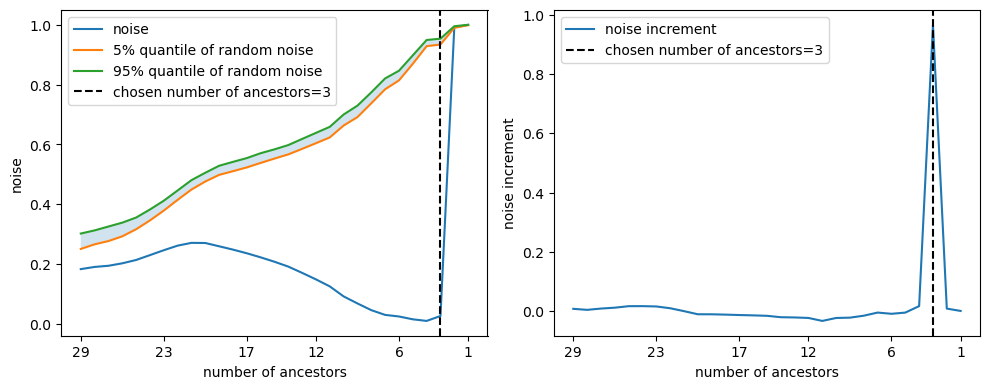

ancestors after pruning:  ['$X_{7}$', '$X_{9}$', '$\\ddot{X}_{8}$'] 



inspecting $X_{9}$
linear kernel (using gamma=2.00e+00)
 n/(n+s)=0.16, Z=1.00
quadratic kernel (using gamma=1.10e+00)
 n/(n+s)=0.13, Z=0.95
what about median ? 52775391.757098764
gaussian kernel (using gamma=1.41e+07)
 n/(n+s)=0.18, Z=0.25
$X_{9}$ has ancestors with quadratic kernel (n/(s+n)=0.13)
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.13, Z=0.95
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}

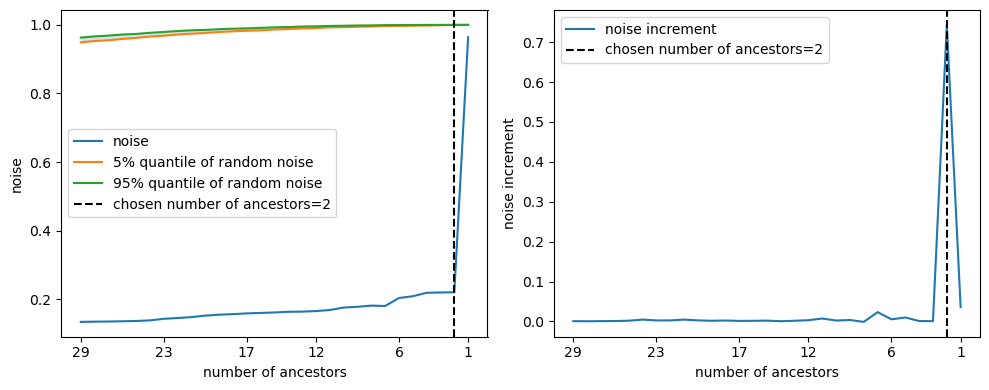

ancestors after pruning:  ['$X_{8}$', '$\\ddot{X}_{9}$'] 



inspecting $\dot{X}_{0}$
linear kernel (using gamma=2.36e+01)
 n/(n+s)=0.89, Z=1.00
quadratic kernel (using gamma=1.73e+01)
 n/(n+s)=0.86, Z=0.96
what about median ? 52752207.681834884
gaussian kernel (using gamma=1.46e+07)
 n/(n+s)=0.20, Z=0.26
$\dot{X}_{0}$ has ancestors with gaussian kernel (n/(s+n)=0.20)
what about median ? 26246640.213289537
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.21, Z=0.27
what about median ? 13017023.583749935
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_

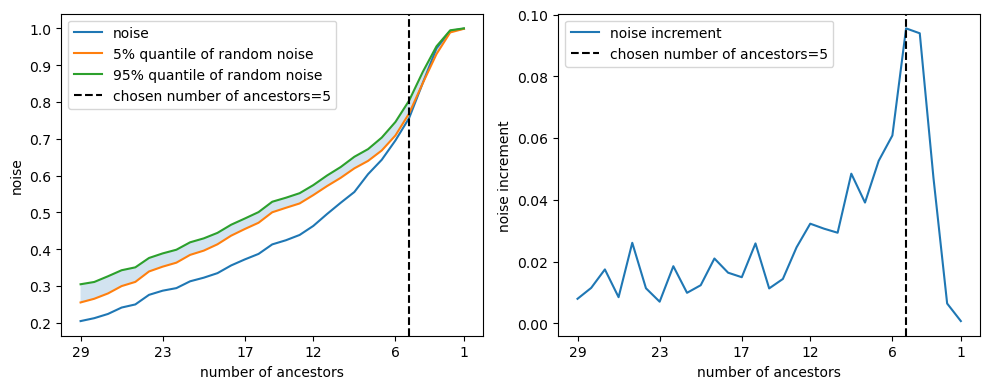

ancestors after pruning:  ['$X_{4}$', '$X_{5}$', '$X_{7}$', '$\\dot{X}_{1}$', '$\\dot{X}_{8}$'] 



inspecting $\dot{X}_{1}$
linear kernel (using gamma=1.86e+01)
 n/(n+s)=0.80, Z=1.00
quadratic kernel (using gamma=1.32e+01)
 n/(n+s)=0.78, Z=0.96
what about median ? 52767664.79009474
gaussian kernel (using gamma=1.44e+07)
 n/(n+s)=0.19, Z=0.25
$\dot{X}_{1}$ has ancestors with gaussian kernel (n/(s+n)=0.19)
what about median ? 26259354.566349305
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.20, Z=0.26
what about median ? 13046064.085840272
ancestors : ['$X_{0}$', '$X_{1}$',

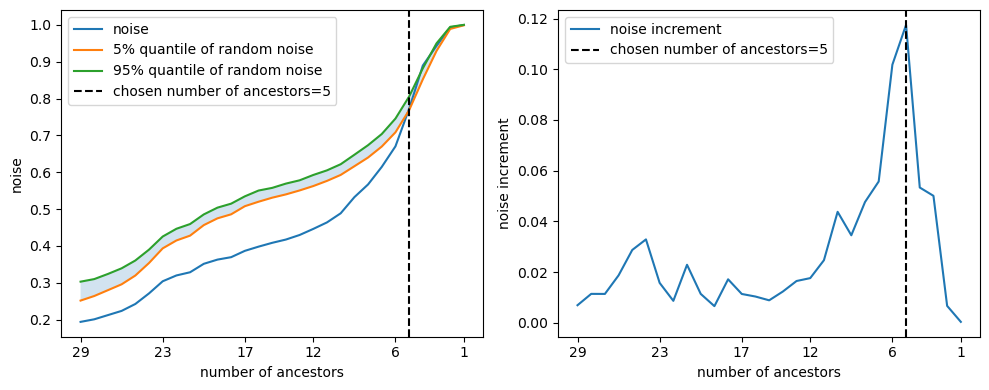

ancestors after pruning:  ['$X_{4}$', '$X_{5}$', '$X_{7}$', '$\\dot{X}_{0}$', '$\\dot{X}_{3}$'] 



inspecting $\dot{X}_{2}$
linear kernel (using gamma=1.76e+01)
 n/(n+s)=0.77, Z=1.00
quadratic kernel (using gamma=1.23e+01)
 n/(n+s)=0.74, Z=0.96
what about median ? 52752696.402256265
gaussian kernel (using gamma=1.43e+07)
 n/(n+s)=0.19, Z=0.25
$\dot{X}_{2}$ has ancestors with gaussian kernel (n/(s+n)=0.19)
what about median ? 26238815.676381923
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.20, Z=0.26
what about median ? 13037134.107290696
ancestors : ['$X_{0}$', '$X_{1}$'

d:\OneDrive - California Institute of Technology\Caltech\Research\Computational hypergraph discovery\GraphDiscovery\newGraphDiscovery.py:198: RuntimeWarning: divide by zero encountered in divide
  return -onp.var(1 / (1 + eigenvalues * onp.exp(-gamma_log)))
c:\Users\theob\AppData\Local\anaconda3\envs\torch\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ancestors : ['$\\dot{X}_{0}$']
 n/(n+s)=1.00, Z=1.00


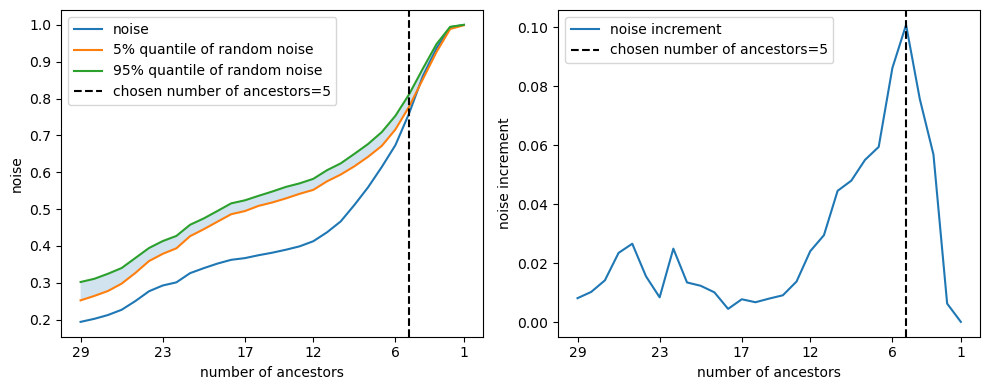

ancestors after pruning:  ['$X_{5}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$'] 



inspecting $\dot{X}_{3}$
linear kernel (using gamma=1.69e+01)
 n/(n+s)=0.75, Z=1.00
quadratic kernel (using gamma=1.18e+01)
 n/(n+s)=0.72, Z=0.96
what about median ? 52746713.1766998
gaussian kernel (using gamma=1.43e+07)
 n/(n+s)=0.19, Z=0.25
$\dot{X}_{3}$ has ancestors with gaussian kernel (n/(s+n)=0.19)
what about median ? 26238274.911597814
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.20, Z=0.26
what about median ? 13030904.018291283
ancestors : ['$X_{0}$

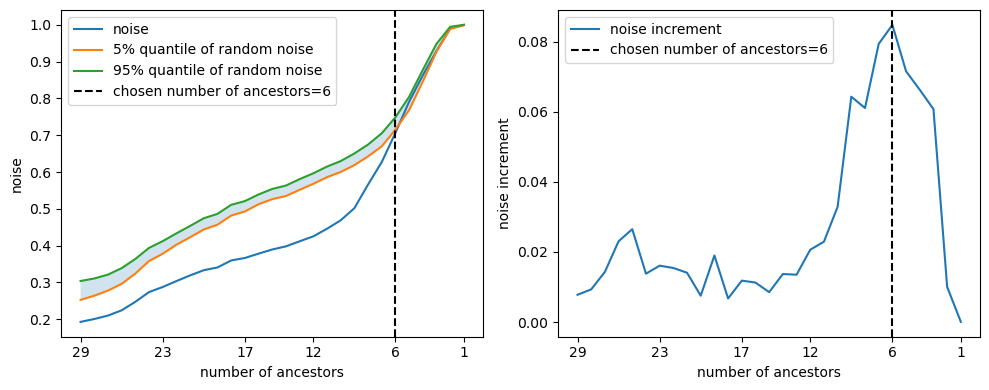

ancestors after pruning:  ['$X_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\ddot{X}_{2}$'] 



inspecting $\dot{X}_{4}$
linear kernel (using gamma=1.61e+01)
 n/(n+s)=0.73, Z=1.00
quadratic kernel (using gamma=1.13e+01)
 n/(n+s)=0.71, Z=0.96
what about median ? 52744905.43410634
gaussian kernel (using gamma=1.41e+07)
 n/(n+s)=0.19, Z=0.25
$\dot{X}_{4}$ has ancestors with gaussian kernel (n/(s+n)=0.19)
what about median ? 26229708.158703618
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.20, Z=0.26
what about median ? 13026448.353562841
a

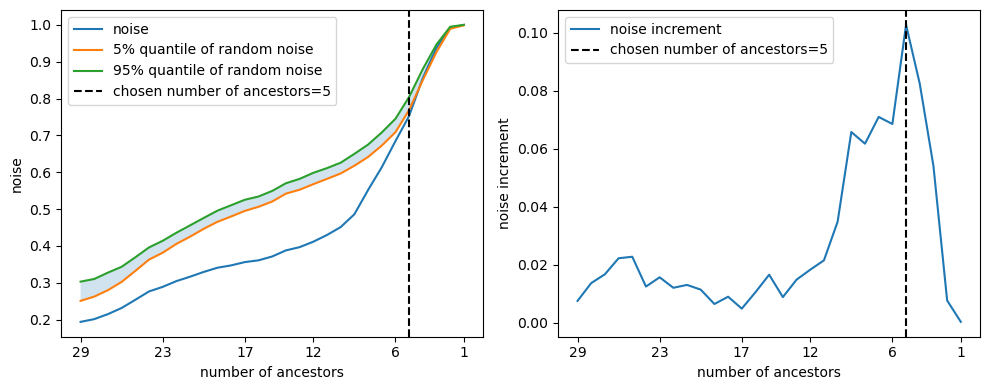

ancestors after pruning:  ['$X_{5}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{5}$', '$\\ddot{X}_{0}$'] 



inspecting $\dot{X}_{5}$
linear kernel (using gamma=1.64e+01)
 n/(n+s)=0.74, Z=1.00
quadratic kernel (using gamma=1.14e+01)
 n/(n+s)=0.70, Z=0.96
what about median ? 52754190.7083682
gaussian kernel (using gamma=1.42e+07)
 n/(n+s)=0.19, Z=0.25
$\dot{X}_{5}$ has ancestors with gaussian kernel (n/(s+n)=0.19)
what about median ? 26246640.213289537
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.20, Z=0.27
what about median ? 13028230.241733607
ancestors : ['$X_{0}

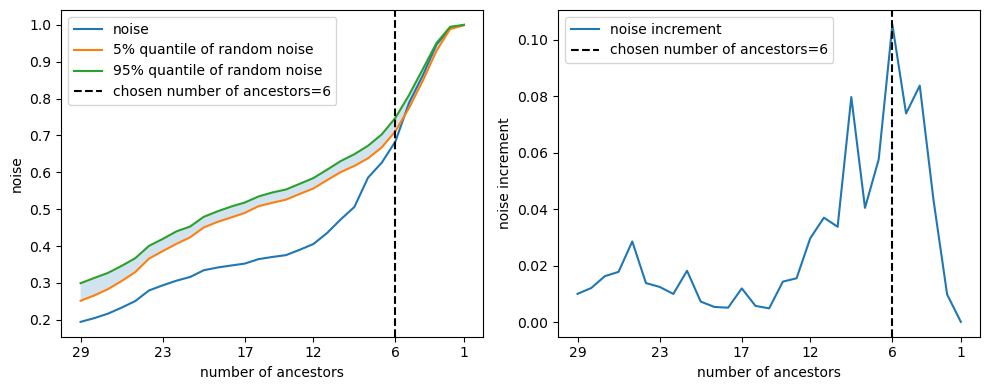

ancestors after pruning:  ['$X_{6}$', '$X_{7}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{6}$', '$\\ddot{X}_{0}$'] 



inspecting $\dot{X}_{6}$
linear kernel (using gamma=1.67e+01)
 n/(n+s)=0.75, Z=1.00
quadratic kernel (using gamma=1.17e+01)
 n/(n+s)=0.71, Z=0.96
what about median ? 52756378.55240479
gaussian kernel (using gamma=1.44e+07)
 n/(n+s)=0.19, Z=0.25
$\dot{X}_{6}$ has ancestors with gaussian kernel (n/(s+n)=0.19)
what about median ? 26238274.911597814
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.20, Z=0.26
what about median ? 13031375.111574873
ancestor

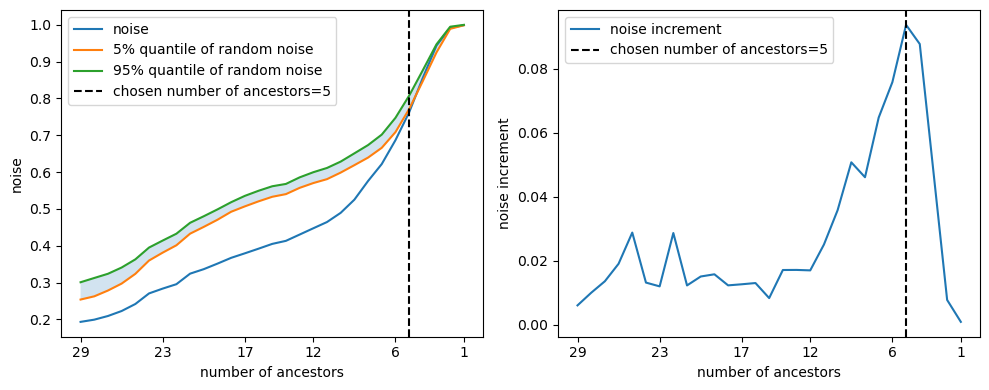

ancestors after pruning:  ['$X_{2}$', '$X_{5}$', '$\\dot{X}_{5}$', '$\\dot{X}_{7}$', '$\\ddot{X}_{1}$'] 



inspecting $\dot{X}_{7}$
linear kernel (using gamma=1.66e+01)
 n/(n+s)=0.75, Z=1.00
quadratic kernel (using gamma=1.16e+01)
 n/(n+s)=0.71, Z=0.96
what about median ? 52779087.59622441
gaussian kernel (using gamma=1.43e+07)
 n/(n+s)=0.19, Z=0.25
$\dot{X}_{7}$ has ancestors with gaussian kernel (n/(s+n)=0.19)
what about median ? 26259354.566349305
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.20, Z=0.26
what about median ? 13039725.152253665
ancestors : ['$X_{0}$', '$

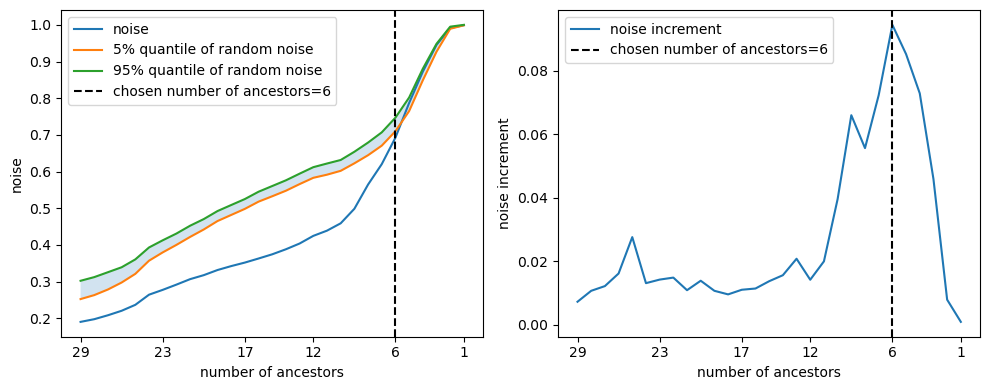

ancestors after pruning:  ['$X_{2}$', '$X_{7}$', '$X_{8}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{8}$'] 



inspecting $\dot{X}_{8}$
linear kernel (using gamma=1.74e+01)
 n/(n+s)=0.78, Z=1.00
quadratic kernel (using gamma=1.24e+01)
 n/(n+s)=0.75, Z=0.96
what about median ? 52784750.23794642
gaussian kernel (using gamma=1.43e+07)
 n/(n+s)=0.19, Z=0.25
$\dot{X}_{8}$ has ancestors with gaussian kernel (n/(s+n)=0.19)
what about median ? 26262907.59707944
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.20, Z=0.26
what about median ? 13050870.694635088
ancestors : ['$X_

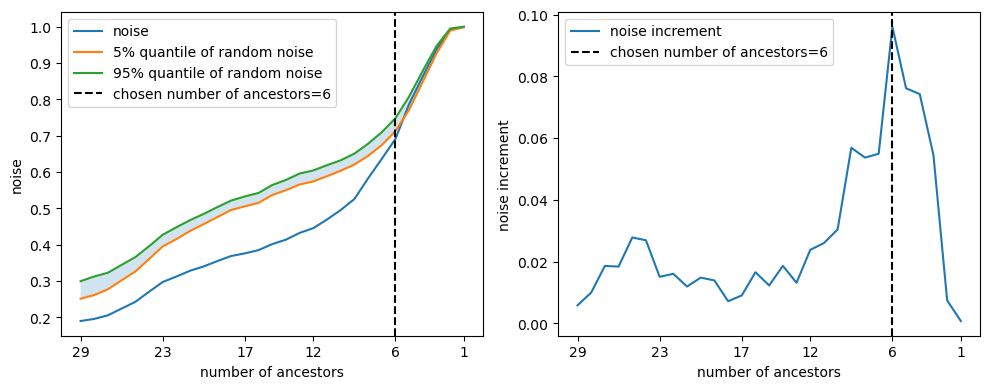

ancestors after pruning:  ['$X_{2}$', '$X_{6}$', '$X_{8}$', '$\\dot{X}_{7}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{3}$'] 



inspecting $\dot{X}_{9}$
linear kernel (using gamma=2.30e+01)
 n/(n+s)=0.88, Z=1.00
quadratic kernel (using gamma=1.68e+01)
 n/(n+s)=0.83, Z=0.96
what about median ? 52740475.96680505
gaussian kernel (using gamma=1.43e+07)
 n/(n+s)=0.20, Z=0.25
$\dot{X}_{9}$ has ancestors with gaussian kernel (n/(s+n)=0.20)
what about median ? 26229708.158703618
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.20, Z=0.26
what about median ? 13035646.71074559
ancestors : ['$X

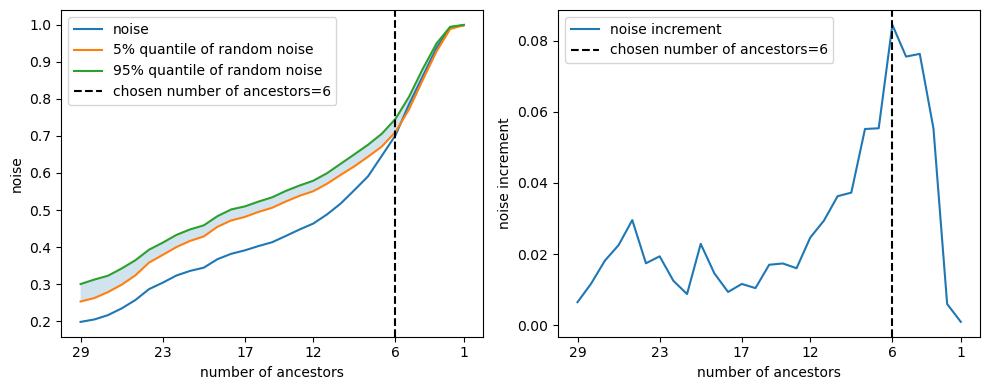

ancestors after pruning:  ['$X_{0}$', '$X_{4}$', '$X_{9}$', '$\\dot{X}_{2}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$'] 



inspecting $\ddot{X}_{0}$
linear kernel (using gamma=1.94e+00)
 n/(n+s)=0.26, Z=1.00
quadratic kernel (using gamma=1.13e+00)
 n/(n+s)=0.26, Z=0.95
what about median ? 52833581.53622486
gaussian kernel (using gamma=1.42e+07)
 n/(n+s)=0.17, Z=0.25
$\ddot{X}_{0}$ has ancestors with gaussian kernel (n/(s+n)=0.17)
what about median ? 26290354.848796964
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.17, Z=0.26
what about median ? 13067453.013007924
ancestors : ['$

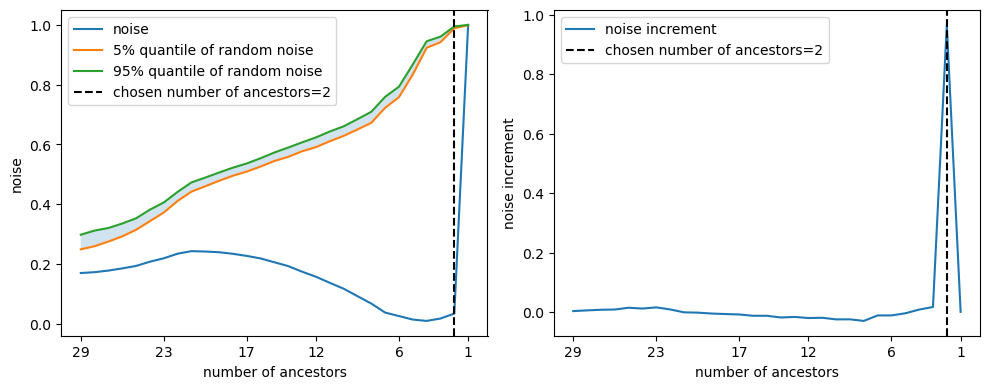

ancestors after pruning:  ['$X_{0}$', '$X_{1}$'] 



inspecting $\ddot{X}_{1}$
linear kernel (using gamma=3.09e+00)
 n/(n+s)=0.41, Z=1.00
quadratic kernel (using gamma=1.85e+00)
 n/(n+s)=0.40, Z=0.96
what about median ? 52849029.68078491
gaussian kernel (using gamma=1.40e+07)
 n/(n+s)=0.17, Z=0.25
$\ddot{X}_{1}$ has ancestors with gaussian kernel (n/(s+n)=0.17)
what about median ? 26299347.121692494
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.17, Z=0.26
what about median ? 13074405.733879426
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '

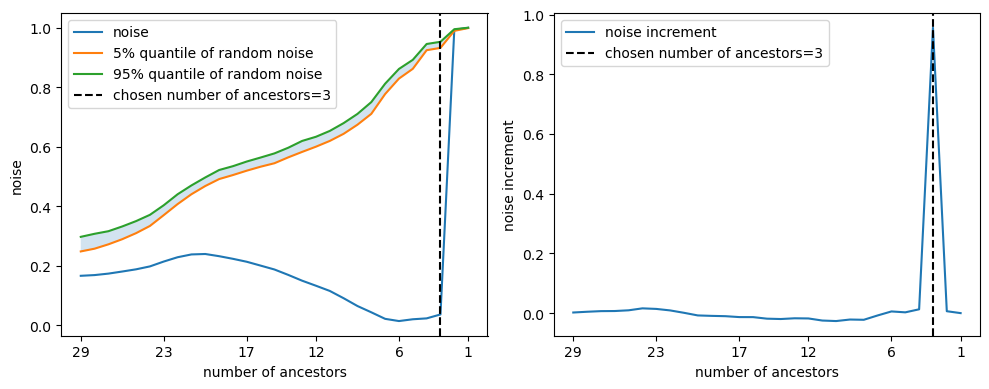

ancestors after pruning:  ['$X_{1}$', '$X_{2}$', '$\\ddot{X}_{0}$'] 



inspecting $\ddot{X}_{2}$
linear kernel (using gamma=2.83e+00)
 n/(n+s)=0.37, Z=1.00
quadratic kernel (using gamma=1.75e+00)
 n/(n+s)=0.36, Z=0.95
what about median ? 52827294.29338539
gaussian kernel (using gamma=1.39e+07)
 n/(n+s)=0.17, Z=0.25
$\ddot{X}_{2}$ has ancestors with gaussian kernel (n/(s+n)=0.17)
what about median ? 26288671.663754735
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.17, Z=0.26
what about median ? 13060701.299704794
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_

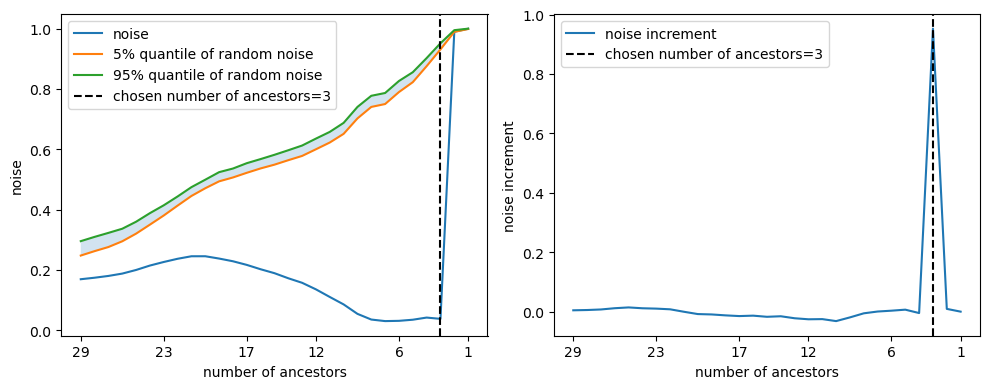

ancestors after pruning:  ['$X_{1}$', '$X_{2}$', '$X_{3}$'] 



inspecting $\ddot{X}_{3}$
linear kernel (using gamma=2.56e+00)
 n/(n+s)=0.36, Z=1.00
quadratic kernel (using gamma=1.66e+00)
 n/(n+s)=0.35, Z=0.95
what about median ? 52817480.456198856
gaussian kernel (using gamma=1.40e+07)
 n/(n+s)=0.17, Z=0.25
$\ddot{X}_{3}$ has ancestors with gaussian kernel (n/(s+n)=0.17)
what about median ? 26278231.659046218
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.18, Z=0.26
what about median ? 13060697.145635769
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', 

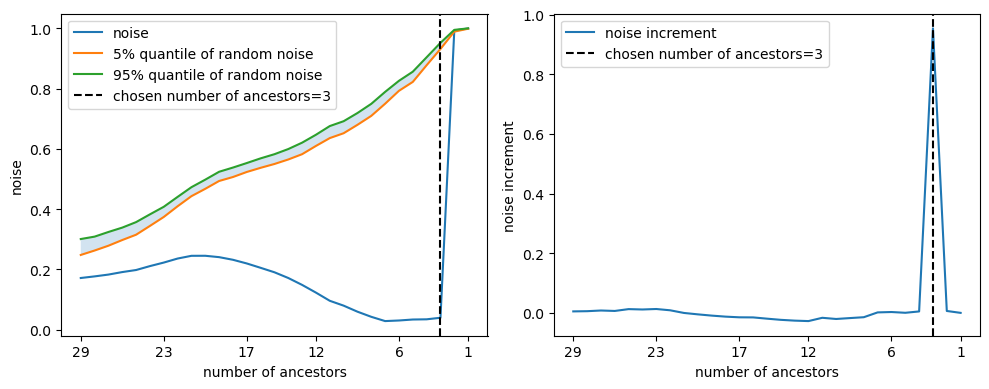

ancestors after pruning:  ['$X_{2}$', '$X_{3}$', '$X_{4}$'] 



inspecting $\ddot{X}_{4}$
linear kernel (using gamma=3.19e+00)
 n/(n+s)=0.39, Z=1.00
quadratic kernel (using gamma=1.97e+00)
 n/(n+s)=0.38, Z=0.96
what about median ? 52820147.74006748
gaussian kernel (using gamma=1.41e+07)
 n/(n+s)=0.17, Z=0.25
$\ddot{X}_{4}$ has ancestors with gaussian kernel (n/(s+n)=0.17)
what about median ? 26285238.372236587
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.18, Z=0.26
what about median ? 13065780.323879177
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '

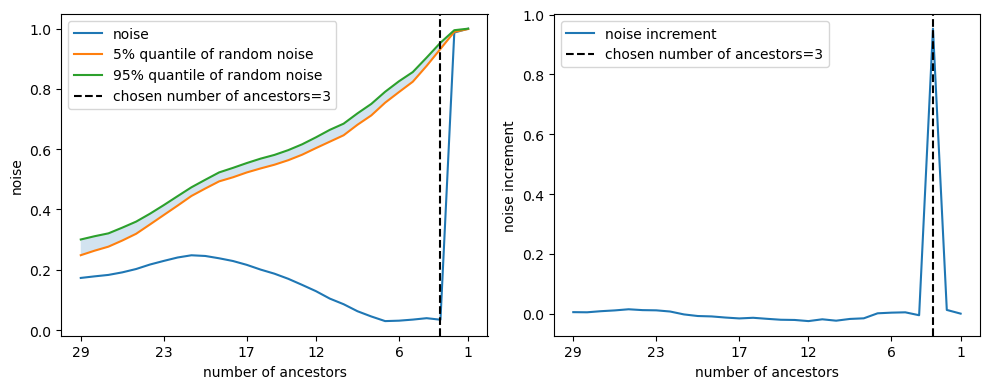

ancestors after pruning:  ['$X_{3}$', '$X_{4}$', '$X_{5}$'] 



inspecting $\ddot{X}_{5}$
linear kernel (using gamma=2.70e+00)
 n/(n+s)=0.37, Z=1.00
quadratic kernel (using gamma=1.56e+00)
 n/(n+s)=0.36, Z=0.95
what about median ? 52826548.10417606
gaussian kernel (using gamma=1.40e+07)
 n/(n+s)=0.17, Z=0.25
$\ddot{X}_{5}$ has ancestors with gaussian kernel (n/(s+n)=0.17)
what about median ? 26292509.24084821
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.17, Z=0.26
what about median ? 13063553.078715045
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$

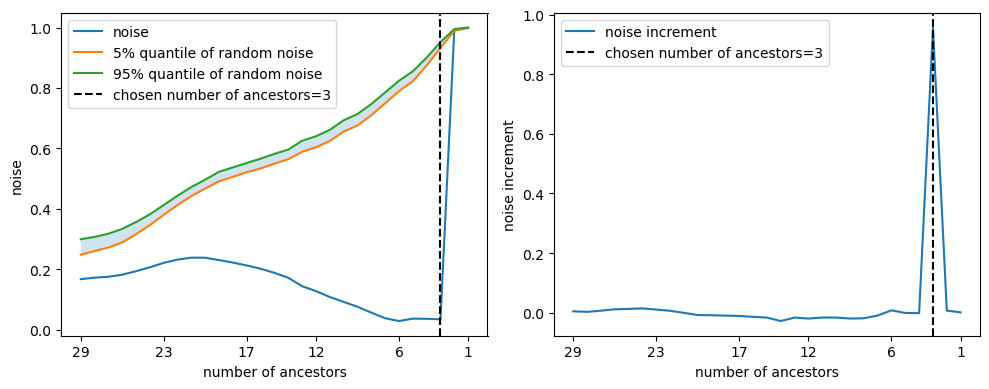

ancestors after pruning:  ['$X_{4}$', '$X_{5}$', '$X_{6}$'] 



inspecting $\ddot{X}_{6}$
linear kernel (using gamma=2.83e+00)
 n/(n+s)=0.38, Z=1.00
quadratic kernel (using gamma=1.69e+00)
 n/(n+s)=0.37, Z=0.95
what about median ? 52829979.33737356
gaussian kernel (using gamma=1.39e+07)
 n/(n+s)=0.17, Z=0.25
$\ddot{X}_{6}$ has ancestors with gaussian kernel (n/(s+n)=0.17)
what about median ? 26298780.071805477
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.17, Z=0.26
what about median ? 13065761.336852081
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '

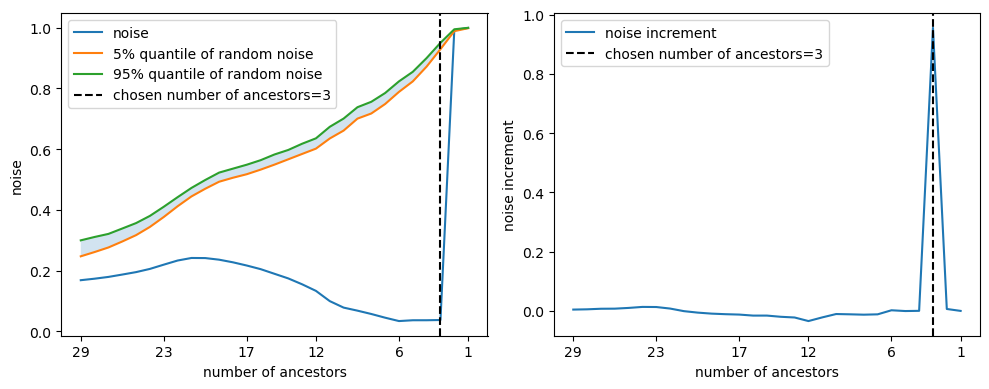

ancestors after pruning:  ['$X_{5}$', '$X_{6}$', '$X_{7}$'] 



inspecting $\ddot{X}_{7}$
linear kernel (using gamma=2.52e+00)
 n/(n+s)=0.37, Z=1.00
quadratic kernel (using gamma=1.47e+00)
 n/(n+s)=0.35, Z=0.95
what about median ? 52838742.21994172
gaussian kernel (using gamma=1.42e+07)
 n/(n+s)=0.17, Z=0.25
$\ddot{X}_{7}$ has ancestors with gaussian kernel (n/(s+n)=0.17)
what about median ? 26291298.839182816
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.17, Z=0.26
what about median ? 13063037.651873676
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '

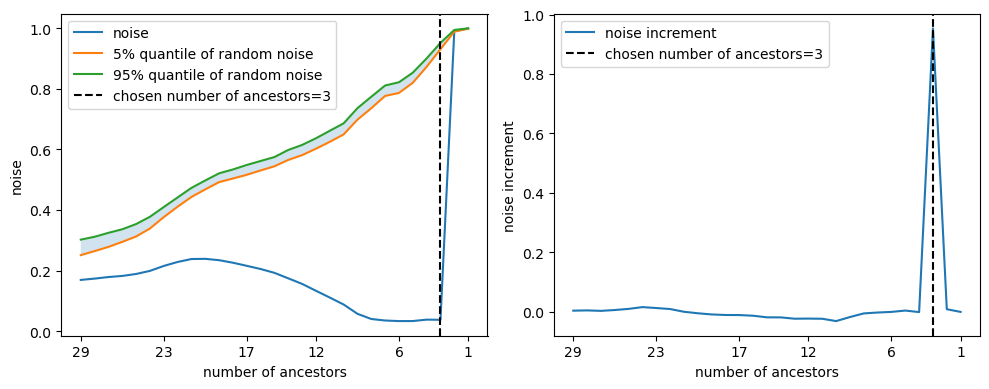

ancestors after pruning:  ['$X_{6}$', '$X_{7}$', '$X_{8}$'] 



inspecting $\ddot{X}_{8}$
linear kernel (using gamma=2.87e+00)
 n/(n+s)=0.41, Z=1.00
quadratic kernel (using gamma=1.71e+00)
 n/(n+s)=0.42, Z=0.95
what about median ? 52833157.19168615
gaussian kernel (using gamma=1.42e+07)
 n/(n+s)=0.17, Z=0.25
$\ddot{X}_{8}$ has ancestors with gaussian kernel (n/(s+n)=0.17)
what about median ? 26298063.817907196
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{9}$']
 n/(n+s)=0.17, Z=0.26
what about median ? 13066059.837164452
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '

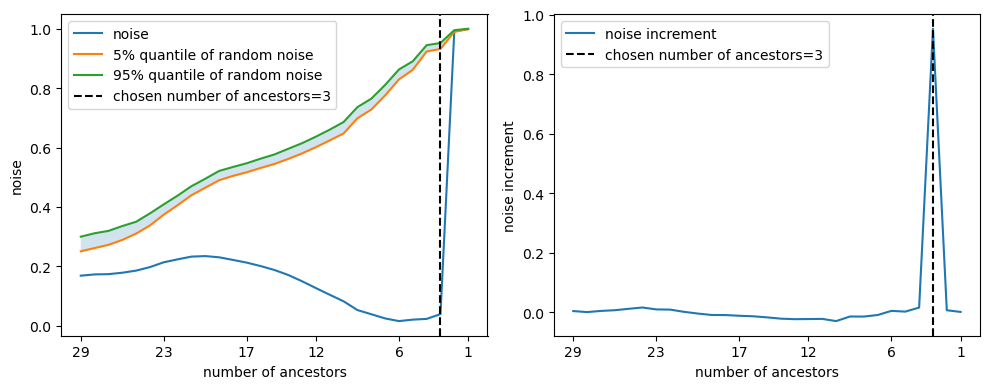

ancestors after pruning:  ['$X_{7}$', '$X_{8}$', '$\\ddot{X}_{9}$'] 



inspecting $\ddot{X}_{9}$
linear kernel (using gamma=1.82e+00)
 n/(n+s)=0.24, Z=1.00
quadratic kernel (using gamma=1.04e+00)
 n/(n+s)=0.22, Z=0.95
what about median ? 52802210.383569
gaussian kernel (using gamma=1.41e+07)
 n/(n+s)=0.17, Z=0.25
$\ddot{X}_{9}$ has ancestors with gaussian kernel (n/(s+n)=0.17)
what about median ? 26278961.41559866
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$', '$X_{5}$', '$X_{6}$', '$X_{7}$', '$X_{8}$', '$X_{9}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$', '$\\ddot{X}_{2}$', '$\\ddot{X}_{3}$', '$\\ddot{X}_{4}$', '$\\ddot{X}_{5}$', '$\\ddot{X}_{6}$', '$\\ddot{X}_{7}$', '$\\ddot{X}_{8}$']
 n/(n+s)=0.18, Z=0.26
what about median ? 13050301.06169477
ancestors : ['$X_{0}$', '$X_{1}$', '$X_{2}$', '$X_{3}$', '$X_{4}$

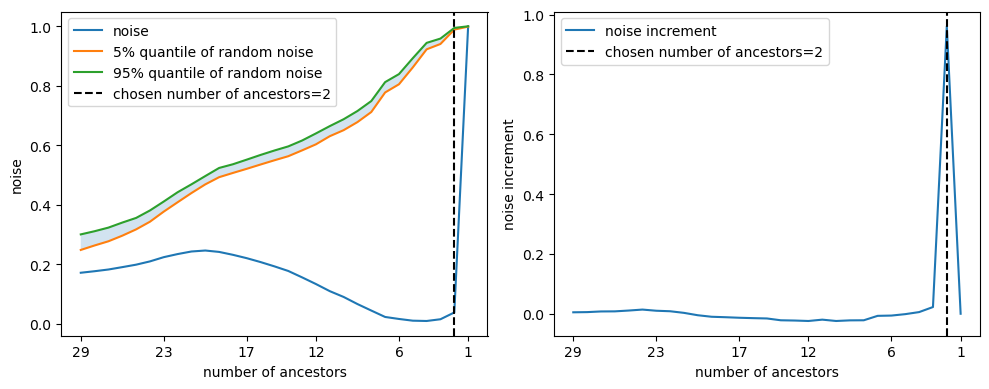

ancestors after pruning:  ['$X_{8}$', '$X_{9}$'] 





In [13]:
for node in graph_discovery.names:
    print(f'inspecting {node}')
    graph_discovery.find_ancestors(
        node,
        gamma='auto'
    )
    print('\n')
    pickle.dump(graph_discovery.G, open(f'graph_nonlinear.pickle', 'wb'))

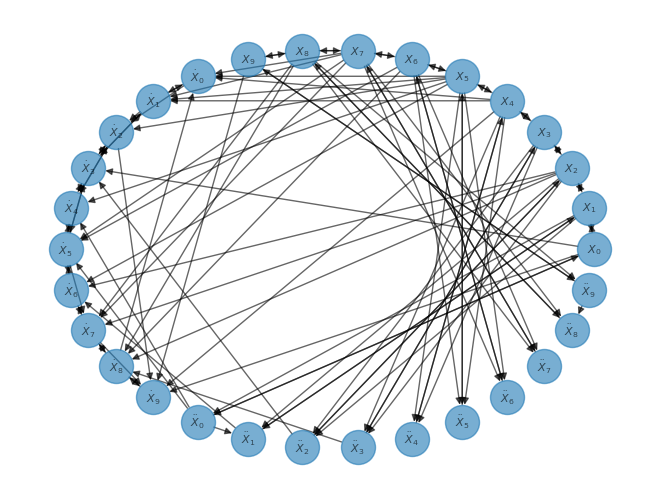

In [15]:
graph_discovery.plot_graph(type_label=False)

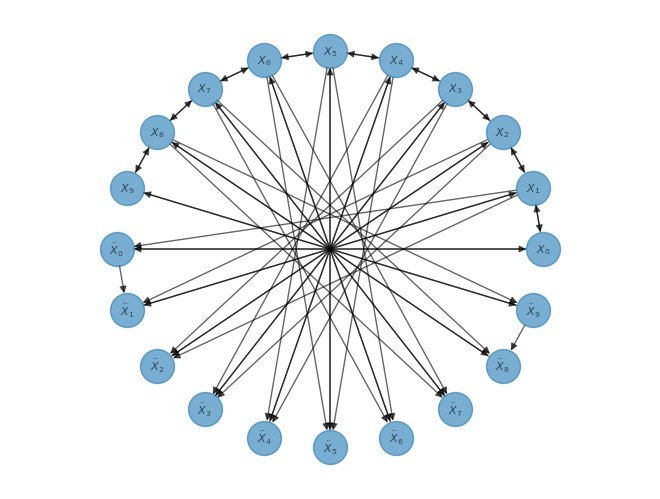

In [16]:
def plot_a_network(G,type_label=True):
    pos=nx.kamada_kawai_layout(G, G.nodes())
    nx.draw(G, with_labels=True, pos=pos, node_size=600, font_size=8, alpha=0.6)
    if type_label:
        nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'type'))
    x_values, y_values = zip(*pos.values())
    x_max = max(x_values)
    x_min = min(x_values)
    x_margin = (x_max - x_min) * 0.25
    plt.xlim(x_min - x_margin, x_max + x_margin)
G2=nx.subgraph(graph_discovery.G,[x for x in graph_discovery.G.nodes() if '\dot' not in x])
plot_a_network(G2,type_label=False)

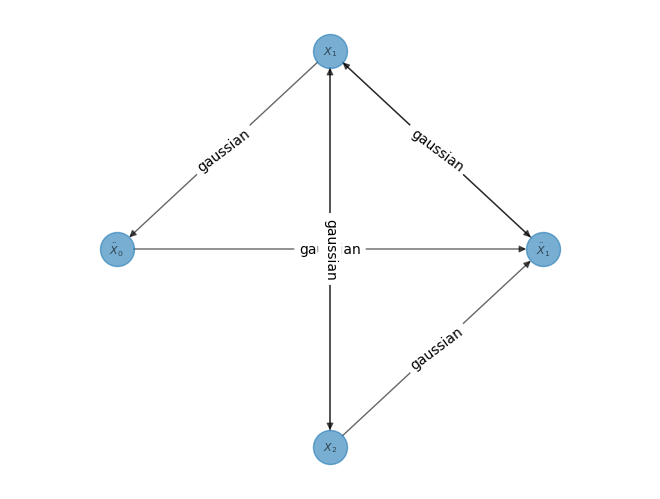

In [17]:
plot_a_network(nx.ego_graph(G2.reverse(),'$\ddot{X}_{1}$',undirected=False,radius=1).reverse(),type_label=True)

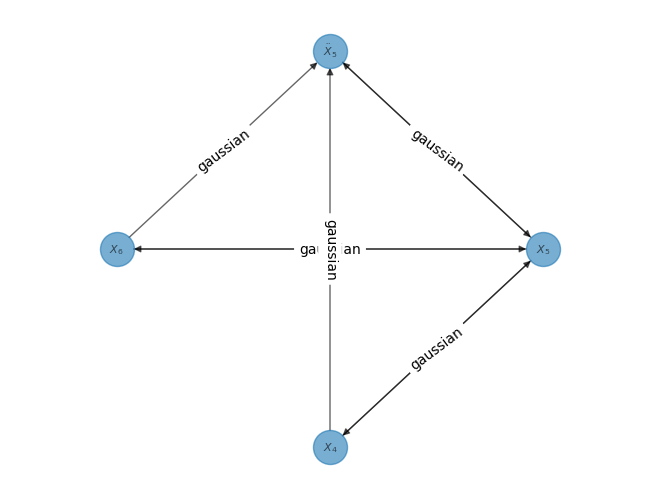

In [18]:
plot_a_network(nx.ego_graph(G2.reverse(),'$X_{5}$',undirected=False,radius=1).reverse(),type_label=True)

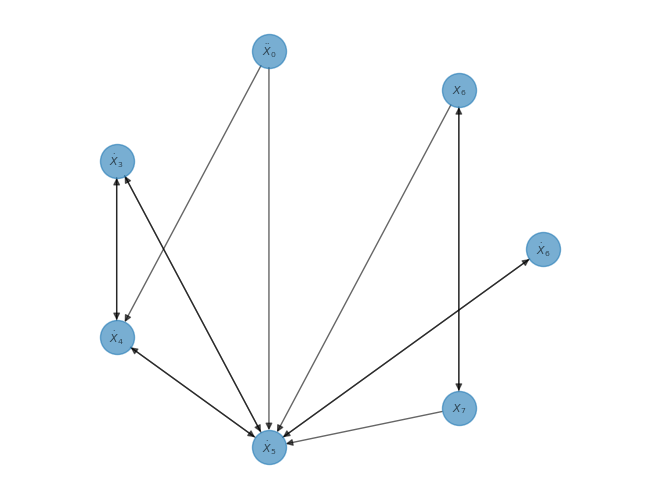

In [20]:
plot_a_network(nx.ego_graph(graph_discovery.G.reverse(),'$\dot{X}_{5}$',undirected=False,radius=1).reverse(),type_label=False)

In [22]:
onp.exp(-16*(9/8-onp.log(2))+9/4)

0.009469822540901543